## visualization 하는 이유 : 데이터 탐색
### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공. (이상치 탐색할 때 사용)

### matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 
- 이외에도 많다.

### seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [8]:
import pandas as pd
df = pd.read_csv('../dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [8]:
df.info()  #object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월일     20 non-null     object
 1   당일종가    20 non-null     int64 
 2   전일종가    20 non-null     int64 
 3   시가      20 non-null     int64 
 4   고가      20 non-null     int64 
 5   저가      20 non-null     int64 
 6   거래량     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [ ]:
#new_columns = ['Date', 'Close', 'Start', 'High', 'Low', 'Volume']
#df.columns = new_columns
#df

In [9]:
df.drop('전일종가', axis=1, inplace=True)
df

,연월일,당일종가,시가,고가,저가,거래량
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [10]:
df.columns=['Date', 'Close', 'Start', 'High', 'Low', 'Volume']
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# # 판다스(Pandas)는 파이썬에서 데이터 분석에 많이 사용되는 라이브러리 중 하나입니다. 
# 데이터 분석 작업 중에는 데이터를 파일로 저장하거나 다른 프로그램으로 전송해야 할 경우가 많습니다.
# 이때, 판다스의 pickle 함수를 사용하면 데이터프레임(DataFrame)이나 시리즈(Series) 등의 객체를 
# 바이트(byte) 형식으로 직렬화(serialization)하여 저장하거나 전송할 수 있습니다.

# # 판다스의 pickle 함수는 다양한 데이터 타입을 처리할 수 있으며, 
# 파일 크기도 작아서 대용량 데이터도 처리할 수 있습니다. 
# 또한, pickle 함수를 사용하면 데이터를 저장하고 불러오는 과정에서 데이터 형식이 유지되기 때문에 
# 데이터의 손실 없이 원본 데이터를 그대로 사용할 수 있습니다. 
# 이러한 이유로 판다스에서는 pickle 함수를 자주 사용합니다.

In [11]:
df.to_pickle('../dataset/sprice.pkl')
df= pd.read_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [13]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'

df['Ndate']=pd.to_datetime(df['Date'])
df.set_index('Ndate', inplace=True)
df1 = df[['Close','Start','High','Low']]
df1.head()

,Close,Start,High,Low
Ndate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Ndate'>

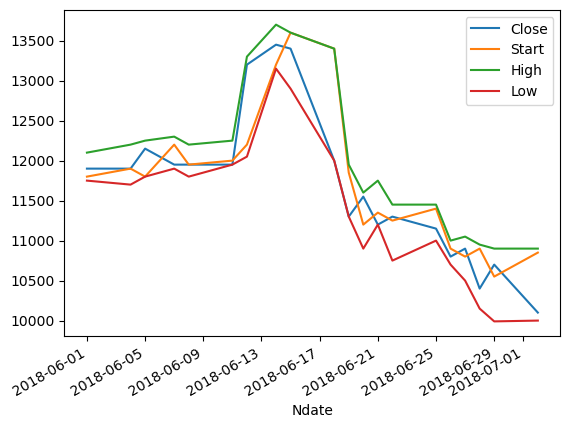

In [14]:
#추세를 보는 건 선 그래프, 기본이 선 그래프여서 아무것도 안 주면 선 그래프로 나온다.

df1.plot()

<AxesSubplot:xlabel='Ndate'>

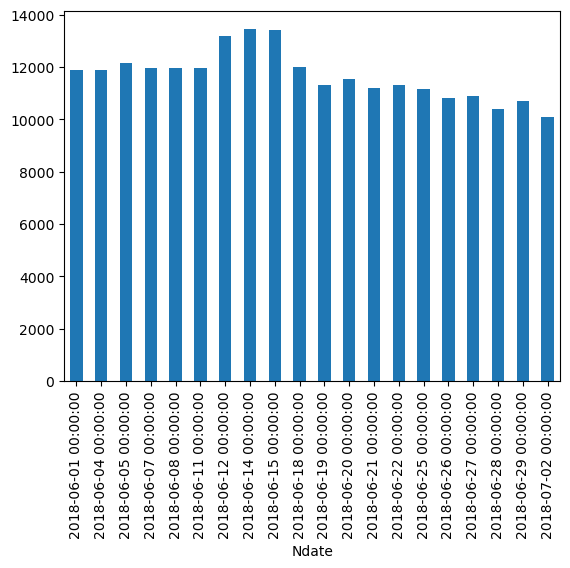

In [14]:
# 막대그래프
# 순서 거꾸로 해서 보도록 할게요
df1.Close[::-1].plot(kind='bar')

In [13]:
import pandas as pd
df= pd.read_pickle('../dataset/sprice.pkl')
df.to_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-07-02,2018-07-02,10100,10850,10900,10000,137977
2018-06-29,2018-06-29,10700,10550,10900,9990,170253
2018-06-28,2018-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2018-06-26,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:xlabel='Ndate'>

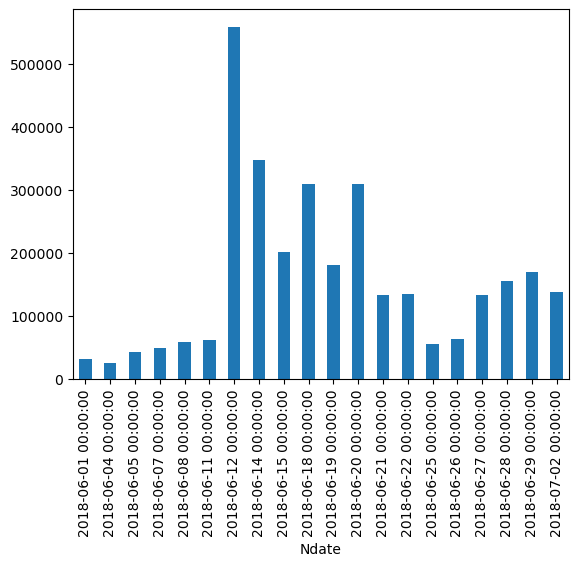

In [18]:
df.Volume[::-1].plot(kind='bar')

<AxesSubplot:xlabel='Ndate'>

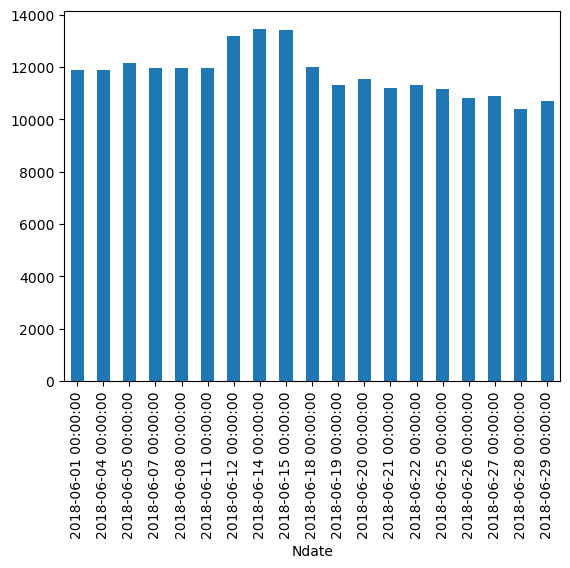

In [6]:
# 6월만 추출하여 close칼럼으로 일별 막대그래프 표현
df.loc['2018-06','Close'][::-1].plot(kind='bar')

#df.loc['2018-06','Volume'][::-1].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

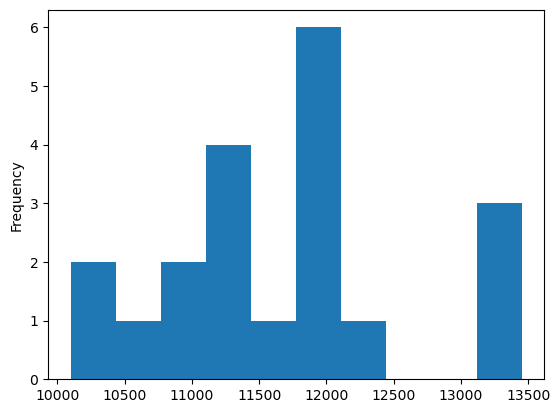

In [7]:
# 히스토그램 : 변수의 도수분포
df.Close.plot(kind='hist', bins=10)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

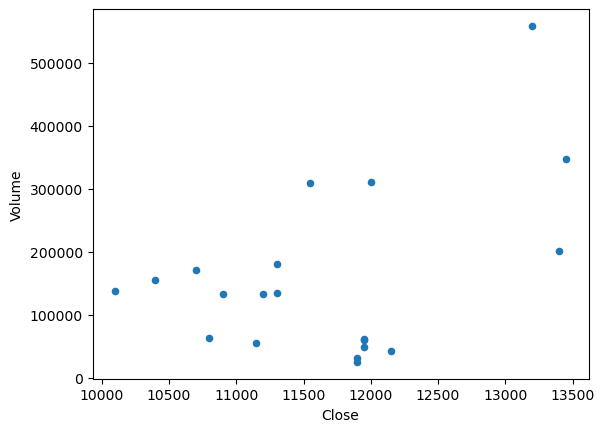

In [18]:
# 산점도
df.plot(x = 'Close', y='Volume',kind='scatter')

In [ ]:
# 이런 분포를 만족하는 예측모델을 만든다고 할 때 어떻게 만들어야할까요?
# 선형회귀를 만들 때 어떤 기준을 가지고 직선을 만들어야할까?
# 예측식을 만들 때 직선과 점들의 거리차이를 오차라고 하는데
# 오차의 합이 제일 작은게 최적의 a와 b(예측모델?)이다. (y=ax+b에서)

In [41]:
df.corr()

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


In [14]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

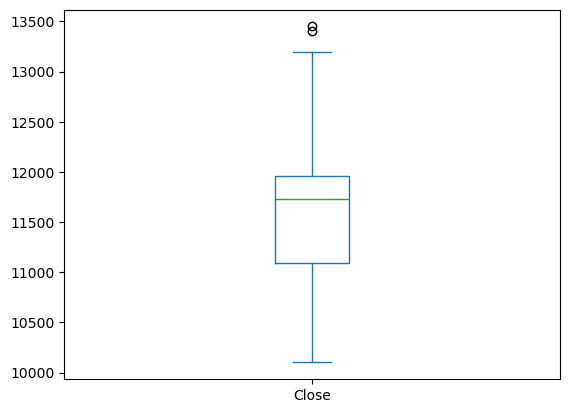

In [15]:
# box plot
# 칼럼데이터의 데이터 분포를 알려준다.

df.Close.plot(kind='box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [16]:
# 이상치
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close'] <= (Q1-IQR*1.5)) | (df['Close'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376
2018-06-14,2018-06-14,13450,13200,13700,13150,347451


In [ ]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값
Q3+IQR*1.5

In [50]:
#upperwhisker는13200
#이상치 : upper whisker를 벗어나는 값(통계적인 측면에서 봤을 때 이상치로 의심할만한 값)
# 과거의 통계적인 데이터를 기준으로 이상치 발행확률이 높다는 것을 의심, 확정 이상치 아님.
df.sort_values('Close',ascending=False)[['Close']].head()

,Close
Ndate,
2018-06-14,13450
2018-06-15,13400
2018-06-12,13200
2018-06-05,12150
2018-06-18,12000


In [1]:
# Start 칼럼의 분포 및 이상치 여부를 탐색하는 box plot및 이상치를 구하세요.
df.Start.plot(kind='box')

NameError: name 'df' is not defined

In [17]:

Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Start'] <= (Q1-IQR*1.5)) | (df['Start'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376


In [54]:
#동완님
def solution(x):
    return x.describe()["75%"] + 1.5*(x.describe()["75%"]-x.describe()["25%"])
def solution1(x):
    return x.describe()["25%"] - 1.5*(x.describe()["75%"]-x.describe()["25%"])

print(df.apply(solution,axis=0)["Start"])
print(df.apply(solution1,axis=0)["Start"])
df[(df.Start>=df.apply(solution,axis=0)["Start"])|(df.Start<=df.apply(solution1,axis=0)["Start"])]

KeyError: '75%'

In [ ]:
# 과제. High, Low 컬럼에 대하여 이상치 여부를 시각화로 확인 후 그 값을 제거하세요.
# 뭘 제거하라는데요 간단하죠 이상치의 인덱스를 구해서 df에서 지워버리세요.

In [57]:
# 남북한의 연도별 발전량 데이터 셋
# 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.
df_ep = pd.read_excel('../dataset/df_ep.xlsx')
df_ep.head()

,year,south,notth
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

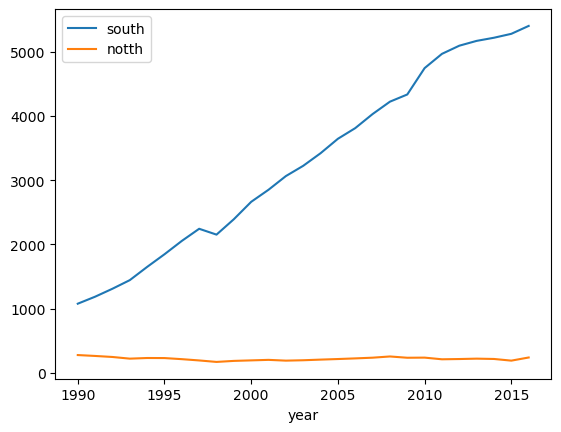

In [62]:
df_ep.set_index('year', inplace=True)
df_ep.plot()


In [18]:
# 과제. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# 과제. mpg 컬럼의 이상치 여부를 판단하시고 의심되는 값이 있는 경우 제거하세요.

df_auto.mpg.plot(kind='box')

NameError: name 'df_auto' is not defined

In [ ]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값

Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1

uwc = Q3+IQR*1.5
uw = df_auto.mpg[df_auto.mpg <= uwc].max()
print('upper whisker : ', uw)
print('이상치 : ', df_auto.mpg[df_auto.mpg>uw].values[0])

# 이상치 삭제
Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1

uwc = Q3+IQR*1.5
idx_uw = df_auto[df_auto.mpg <= uwc].mpg.idxmax()

idx = df_auto[df_auto.mpg > df_auto.loc[idx_uw,'mpg']].index[0]
idx
df = df_auto.drop(df_auto.index[idx])

df.sort_values('mpg',ascending=False)[['mpg']].head()

In [7]:
df_auto[['mpg','weight']].plot(x='mpg',y='weight',kind='scatter',figsize=(10,5))

NameError: name 'df_auto' is not defined

4/4

#### Matplotlib
- 파이썬에서 사용되는 대표적인 데이터 시각화 라이브러리. 
- 2D, 3D 그래프, 히스토그램, 산점도, 파이차트 등 다양한 그래프를 지원하며, 
- 사용자가 그래프의 세부적인 설정을 조절할 수 있도록 다양한 옵션을 제공
- 핵심적인 개념은 Figure(그림)와 Axes(축)
- Figure는 그래프 전체를 의미하며, 하나의 Figure에 여러 개의 Axes를 추가하여 서로 다른 그래프를 그림 
- Axes는 Figure 내부의 그래프 영역을 의미하며, x축과 y축을 포함한 그래프 요소들을 생성하는 역할

<function matplotlib.pyplot.show(close=None, block=None)>

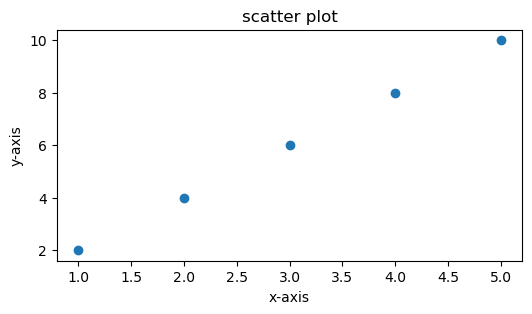

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
x= [1,2,3,4,5]
y= [2,4,6,8,10]
# 그래프 사이즈 조절
plt.figure(figsize=(6,3))
# 산점도 그래프 그리기
plt.scatter(x,y)
# 그래프 제목, x,y축 레이블 설정
plt.title("scatter plot")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# 그래프 출력
plt.show

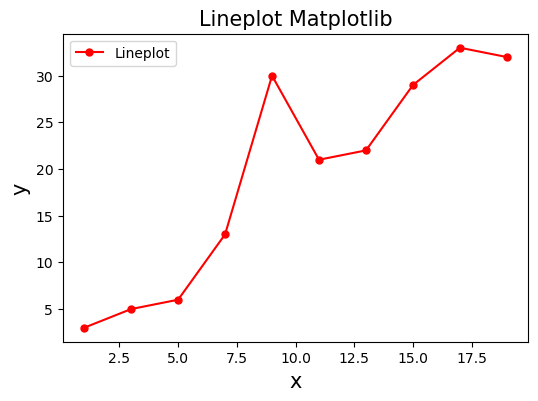

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(1,21,2)
y= np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(6,4))
plt.plot(x,y,color='red', marker='o', markersize =5)
plt.title ('Lineplot Matplotlib', size = 15)
plt.xlabel('x', size =15)
plt.ylabel('y', size =15)
plt.legend(labels=['Lineplot'])

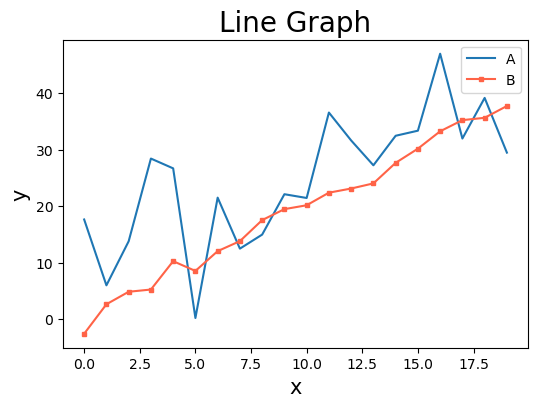

In [35]:
import matplotlib.pyplot as plt
np.random.seed(0)
x= np.arange(20)
y1=np.arange(20)*2 + np.random.randn(20)*10
y2=np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(6,4))
plt.plot(x,y1)
plt.plot(x,y2, color='tomato',marker='s',markersize=3)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.title('Line Graph',size=20)
plt.legend(['A','B'])

<function matplotlib.pyplot.show(close=None, block=None)>

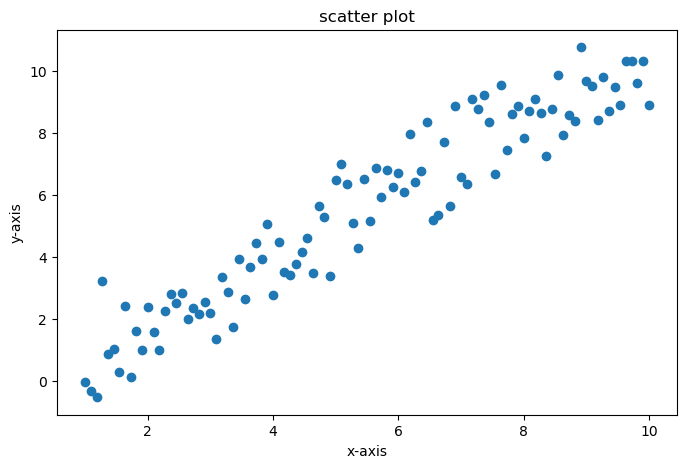

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
y=[]
x= np.linspace(1,10,100)
for i in x:
    r = i + np.random.normal(0,1) #분산 1
    y.append(r)
# 그래프 사이즈 조절
plt.figure(figsize=(8,5))
# 산점도 그래프 그리기
plt.scatter(x,y)
# 그래프 제목, x,y축 레이블 설정
plt.title("scatter plot")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# 그래프 출력
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

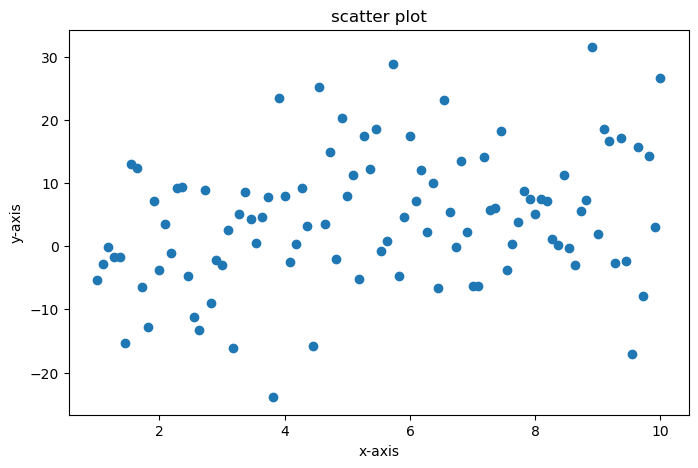

In [40]:
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
y=[]
x= np.linspace(1,10,100)
for i in x:
    r = i + np.random.normal(0,10) #분산 10
    y.append(r)
# 그래프 사이즈 조절
plt.figure(figsize=(8,5))
# 산점도 그래프 그리기
plt.scatter(x,y)
# 그래프 제목, x,y축 레이블 설정
plt.title("scatter plot")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# 그래프 출력
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

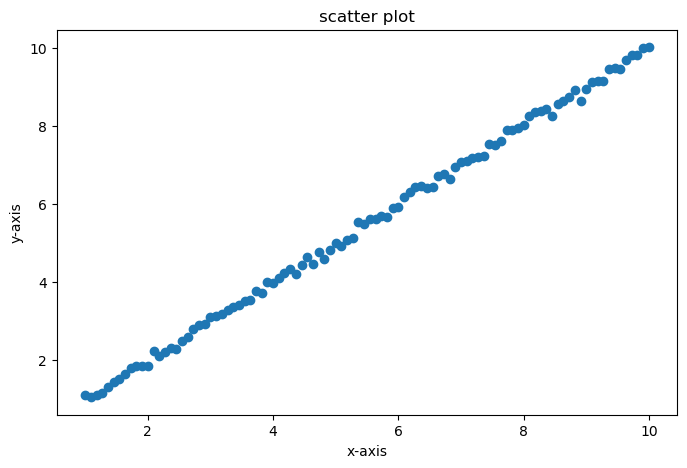

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# 데이터 생성
y=[]
x= np.linspace(1,10,100)
for i in x:
    r = i + np.random.normal(0,0.1) #분산 0.1
    y.append(r)
# 그래프 사이즈 조절
plt.figure(figsize=(8,5))
# 산점도 그래프 그리기
plt.scatter(x,y)
# 그래프 제목, x,y축 레이블 설정
plt.title("scatter plot")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
# 그래프 출력
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

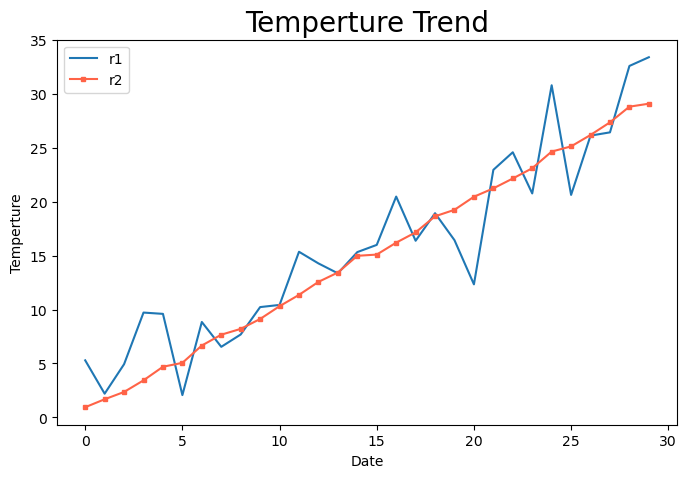

In [17]:
# 두 개의 데이터셋을 생성한 후 Line Graph를 작성하세요
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

x= np.arange(30)
y1= np.arange(30)+np.random.randn(30)*3
y2= np.arange(30)+np.random.rand(30)
plt.figure(figsize=(8,5))
plt.plot(x,y1)
plt.plot(x,y2, color='tomato',marker='s',markersize=3)

plt.title("Temperture Trend",size=20)
plt.xlabel('Date',size=10)
plt.ylabel('Temperture',size=10)
plt.legend(['r1','r2'])

plt.show

range(0, 10)
[9 5 4 6 8 5 8 8 7 7]


Text(0, 0.5, 'y')

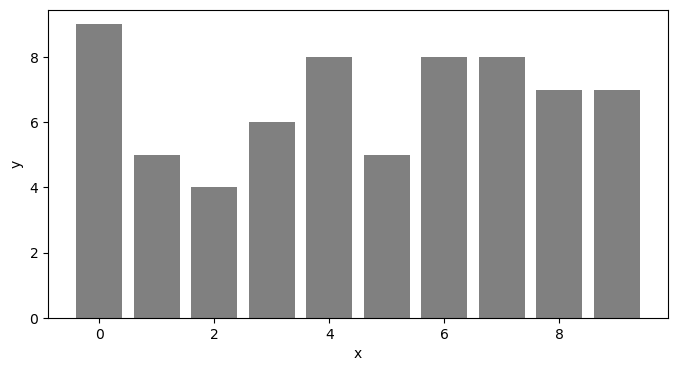

In [23]:
# 막대 그래프 : 지역별 소득수준
y= np.random.randint(2,10,size=10)
x= range(len(y))

print(x)
print(y)

plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8, color='gray')
plt.xlabel('x')
plt.ylabel('y')

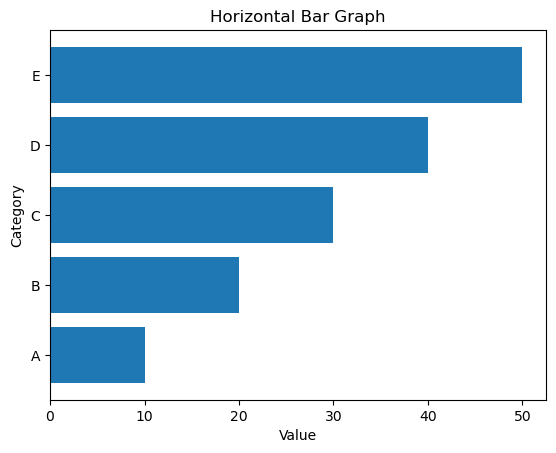

In [29]:
import matplotlib.pyplot as plt

# 데이터 생성
x= [10,20,30,40,50]
y= ['A','B','C','D','E']

# 수평 막대 그래프 그리기
plt.barh(y,x)

# x,y축 레이블, 그래프 제목 추가
plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Horizontal Bar Graph')

# 그래프 보여주기
plt.show()


<BarContainer object of 5 artists>

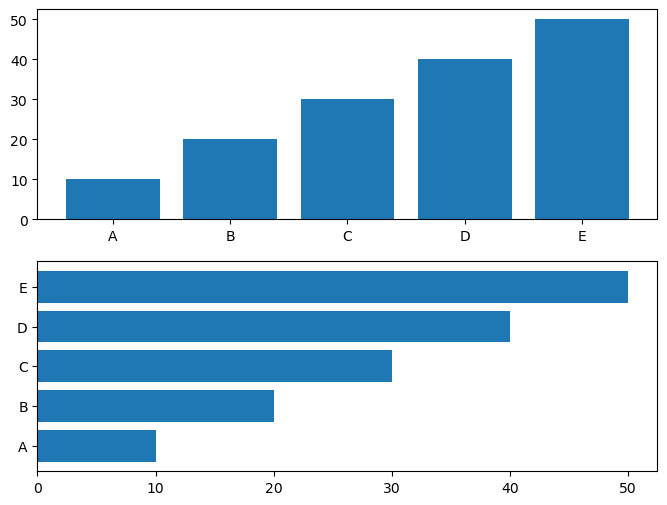

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(y,x)
ax2.barh(y,x)

<BarContainer object of 5 artists>

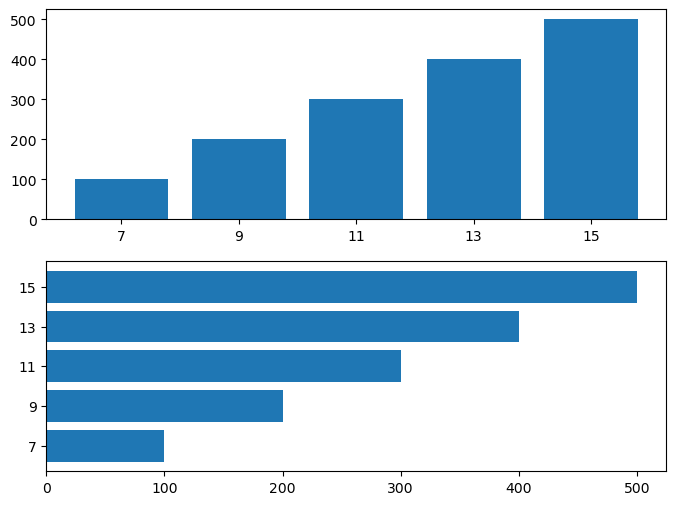

In [3]:
# 막대 그래프가 적절한 case를 생성한 후 , 수평, 수직 막대그래프를 같이 표현하는 시각화 수행

# 지하철역 별 이용자 수
# 영등포역 시간대별 이용자 수

import numpy as np
import matplotlib.pyplot as plt

#수직
y= np.random.randint(1,6)
x= [100,200,300,400,500]


#수평
# 데이터 생성
x= [100,200,300,400,500]
y= ['7','9','11','13','15']


fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(y,x)
ax2.barh(y,x)

<BarContainer object of 9 artists>

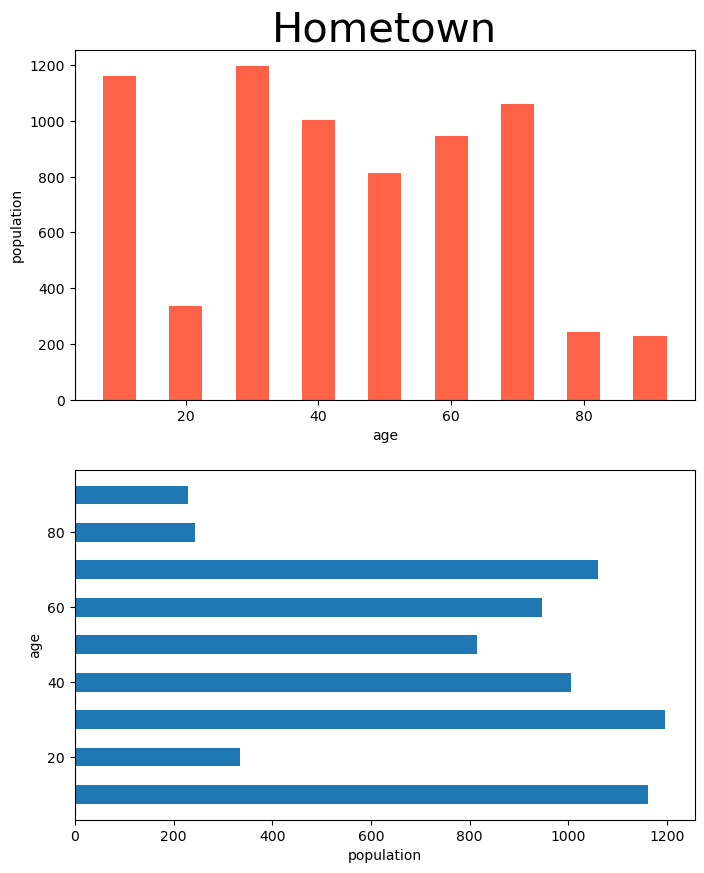

In [16]:
np.random.seed(1)
x = np.arange(10,100,10)
y = np.random.randint(100,1500,9)

fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(2,1,1)
plt.title("Hometown",size=30)
plt.xlabel("age",size=10)
plt.ylabel("population",size=10)
ax2 = fig.add_subplot(2,1,2)
plt.ylabel("age",size=10)
plt.xlabel("population",size=10)


ax1.bar(x,y,color="tomato",width=5)
ax2.barh(x,y,height=5)

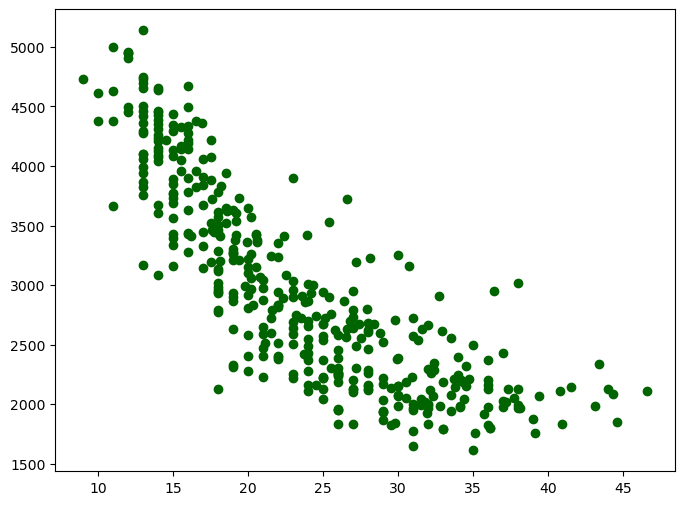

In [23]:
# scatter plot
import pandas as pd
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight

plt.figure(figsize=(8,6))
plt.scatter(x,y,color='darkgreen')

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

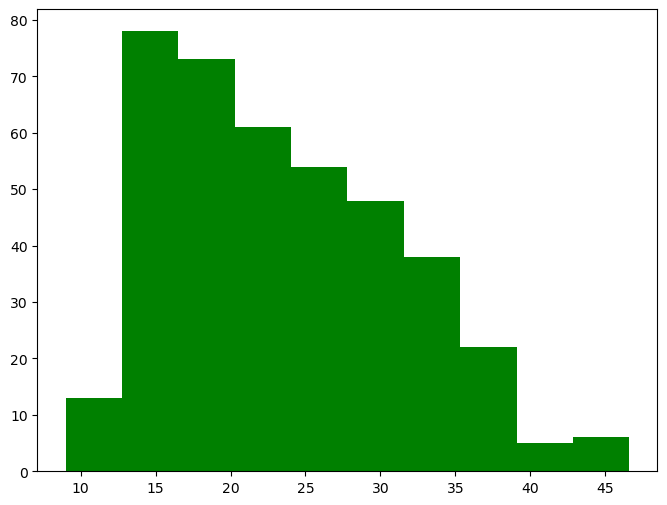

In [28]:
# histogram
plt.figure(figsize=(8,6))
plt.hist(df_auto.mpg, bins=10, color = 'green')
#x축은 mpg, y축은 개수(13,78,73개...)

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

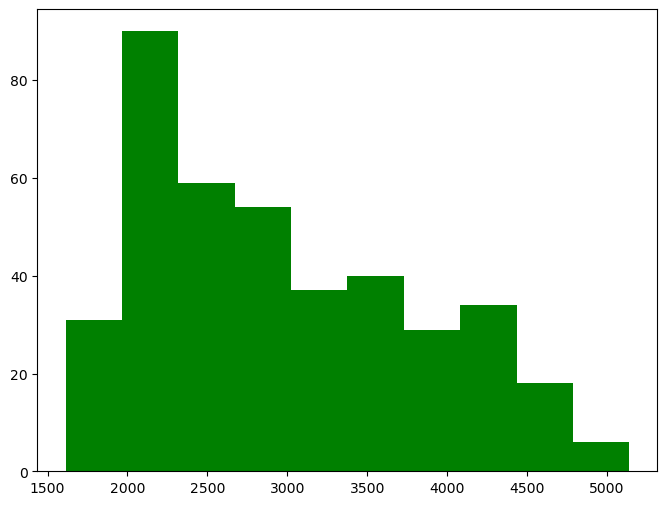

In [29]:
plt.figure(figsize=(8,6))
plt.hist(df_auto.weight, bins=10, color = 'green')
#x축은 weight, y축은 개수

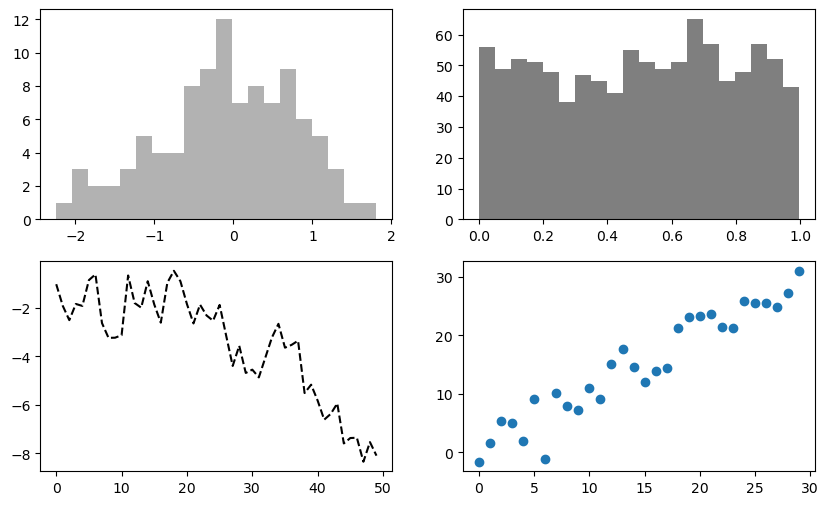

In [5]:
# 먼저 축을 만든다. fig = 어쩌고
# 2행 2열 몇번째 ---> ax1~4
# alpha -> 투명도
# cumsum -> 누적합계
# k = black
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.hist(np.random.rand(1000),bins=20,color='k',alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
# 'k--': plot 함수의 세번째 인자로, 그래프의 스타일을 나타냅니다. 
# 'k--'는 검정색('k') 점선('--') 스타일을 의미합니다.
ax4.scatter(np.arange(30),np.arange(30)+(3*np.random.randn(30)))
# #위 코드는 Matplotlib 라이브러리의 scatter() 메소드를 이용하여 
# 새로운 하위 그래프(subplot) ax4에 산점도(Scatter plot)를 그리는 코드입니다.

# # scatter() 메소드는 두 개의 인자(x, y)를 받습니다. 
# x와 y는 각각 x축과 y축에 해당하는 값들을 나타내는 배열입니다. 
# 이 때, x와 y의 길이는 같아야 합니다.

# # np.arange(30)는 0부터 29까지의 값을 가지는 배열을 생성하고, 
# np.arange(30)+3*np.random.randn(30)는 평균이 0이고 표준편차가 3인 
# 정규 분포(Normal distribution)에서 무작위로 추출한 30개의 난수를 생성하여 
# np.arange(30)에 더한 값들로 이루어진 배열을 생성합니다. 
# 이렇게 생성된 두 개의 배열을 scatter() 메소드의 x와 y에 전달하여 산점도를 그립니다.

# # 따라서 ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30)) 코드는 
# ax4 객체에 0부터 29까지의 값들이 x축에 대응하고, 
# 이 값들에 평균이 0이고 표준편차가 3인 정규 분포에서 추출한 30개의 난수를 더한 값들이 
# y축에 대응하는 산점도를 그리는 것을 의미합니다.

#### 과제1) 각 그래프로 표현할 수 있는 적합한 4개의 데이터셋을 히스토그램, 막대그래프, 선그래프, 산점도로 표현하세요.(2x2)

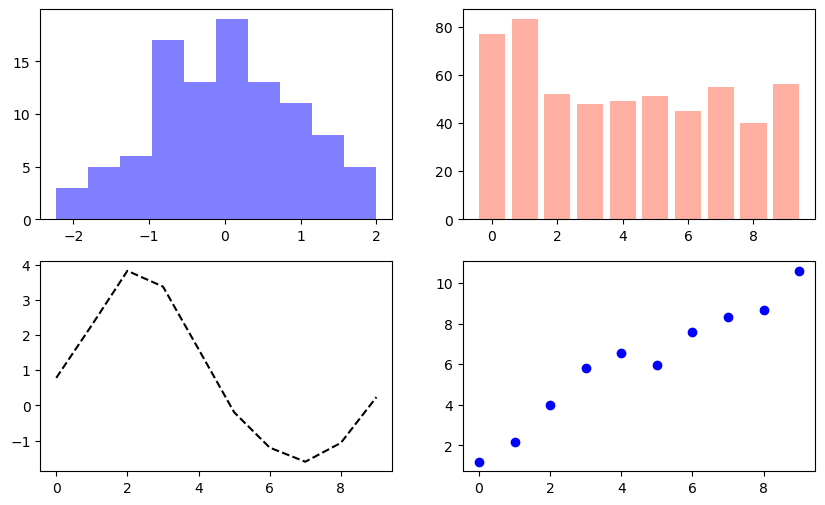

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

x=np.arange(10)
y=np.random.randint(40,100,10)

x1=np.arange(10)
y1=np.arange(10)+np.random.rand(10)*3


ax1.hist(np.random.randn(100),bins=10,color='b', alpha=0.5)
ax2.bar(x,y,color='tomato',alpha=0.5)
ax3.plot(np.random.randn(10).cumsum(),'k--')
ax4.scatter(x1,y1,color='b')


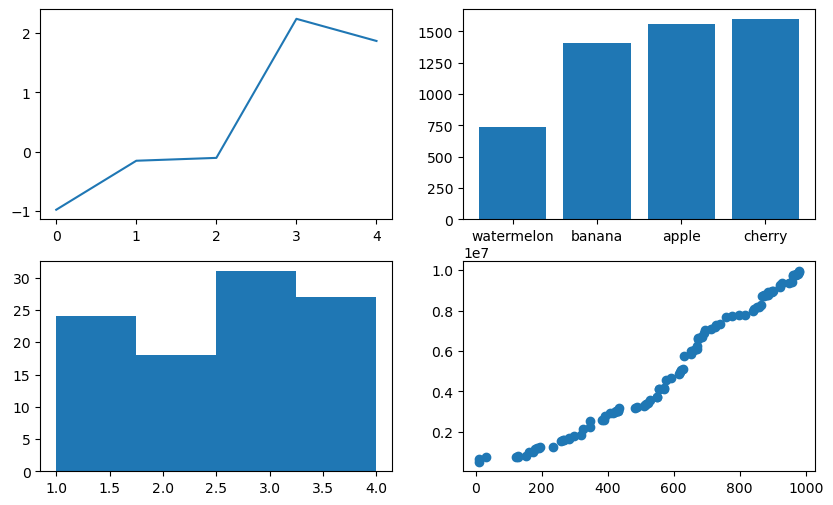

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)
x1 = np.random.randn(10)
x1.sort()
x1[x1>0] = x1[x1>0][::-1]
x1 = x1[:5]
#print(plt.plot(x1)) #3분기에 매출이 감소 

x2 = ["watermelon","banana","apple","cherry"]
np.random.seed(1)
y2 = np.random.randint(500,2000,4)
y2.sort() 
#plt.bar(x2,y2) #3분기 -> 4분기 시점에 수박의 매출 감소

np.random.seed(2)
#x3 = [1]*np.random.randint(30,40)+[2]*np.random.randint(50,60)+[3]*np.random.randint(10,20)+[4]*np.random.randint(5,10)
#plt.hist(x3)
#print(x3) -> 이렇게 쓰는 게 맞나? 
x3=np.random.randint(1,5,100) #1,2,3,4의 카운트를 히스토그램으로 나타냈다.

np.random.seed(3)
x4 = np.random.randint(10,1000,100)
y4 = np.random.randint(500000,10000000,100)
x4.sort()
y4.sort()
#plt.scatter(x4,y4)

fig = plt.figure(figsize=(10,6))
ex1 = fig.add_subplot(2,2,1)
ex2 = fig.add_subplot(2,2,2)
ex3 = fig.add_subplot(2,2,3)
ex4 = fig.add_subplot(2,2,4)
ex1.plot(x1)
ex2.bar(x2,y2)
ex3.hist(x3,bins=4)
ex4.scatter(x4,y4)

In [ ]:
fig,axes

# 파이썬에서 "axes"는 다차원 배열에서 각 차원의 축(axis)을 나타내는 용어입니다. 
# 예를 들어, 2차원 배열에서 첫 번째 축은 행(row)을, 두 번째 축은 열(column)을 나타냅니다.

# # 넘파이(NumPy)에서도 "axes" 용어가 사용되며, 다차원 배열을 다룰 때 특히 유용합니다. 
# axes는 축을 나타내는 정수 값이며, 각 축의 인덱스는 0부터 시작합니다.

# # axes는 다차원 배열의 형태를 파악하고, 데이터를 다룰 때 각 축의 방향을 이해하는 데 도움이 됩니다.
# 또한, 다차원 배열의 연산을 수행할 때 축을 지정하여 원하는 축 방향으로 연산을 수행할 수 있습니다.

넘파이(NumPy)는 다차원 배열을 다루는 라이브러리입니다. 하지만, 데이터를 시각화하기 위해서는 Matplotlib 라이브러리와 함께 사용되기도 합니다. 이때, Matplotlib에서는 "Figure(그림)"와 "Axes(축)"라는 개념이 사용됩니다.

Figure(그림): 그림 전체를 의미합니다. 즉, 모든 시각화 요소들이 위치하는 공간을 말합니다. Figure 객체는 하나 이상의 Axes 객체를 포함할 수 있습니다.

Axes(축): 그림의 한 부분을 나타내며, 플롯 영역(plot area)을 의미합니다. 즉, 데이터가 표시되는 영역입니다. 각각의 Axes 객체는 하나의 플롯(plot)을 나타내며, 그림에 여러 개의 플롯을 그릴 때에는 Axes 객체를 여러 개 생성하여 사용할 수 있습니다.

따라서, Matplotlib에서 그림을 그릴 때에는 먼저 Figure 객체를 생성한 후, Axes 객체를 생성하여 Figure에 추가합니다. 그리고, Axes 객체에 원하는 시각화 요소들을 추가하여 그림을 완성합니다. 이때, Figure와 Axes는 서로 독립적으로 조작될 수 있으며, 각각의 속성을 설정하여 그림의 모양과 크기, 그리고 플롯의 위치와 크기 등을 조절할 수 있습니다.

(array([3.00000e+00, 6.00000e+00, 1.10000e+01, 3.30000e+01, 6.70000e+01,
        1.77000e+02, 3.79000e+02, 9.53000e+02, 2.04600e+03, 4.14400e+03,
        7.82700e+03, 1.47990e+04, 2.64720e+04, 4.56900e+04, 7.45420e+04,
        1.17191e+05, 1.74631e+05, 2.48977e+05, 3.38626e+05, 4.42652e+05,
        5.51957e+05, 6.56302e+05, 7.48956e+05, 8.13016e+05, 8.45517e+05,
        8.40982e+05, 7.98187e+05, 7.25906e+05, 6.29745e+05, 5.21657e+05,
        4.13223e+05, 3.13310e+05, 2.26804e+05, 1.57426e+05, 1.03930e+05,
        6.58070e+04, 3.94680e+04, 2.29480e+04, 1.26080e+04, 6.62700e+03,
        3.34700e+03, 1.68700e+03, 7.71000e+02, 3.43000e+02, 1.46000e+02,
        6.00000e+01, 3.30000e+01, 5.00000e+00, 3.00000e+00, 3.00000e+00]),
 array([-5.29844626, -5.08534346, -4.87224065, -4.65913784, -4.44603504,
        -4.23293223, -4.01982943, -3.80672662, -3.59362381, -3.38052101,
        -3.1674182 , -2.9543154 , -2.74121259, -2.52810979, -2.31500698,
        -2.10190417, -1.88880137, -1.67569856, -1

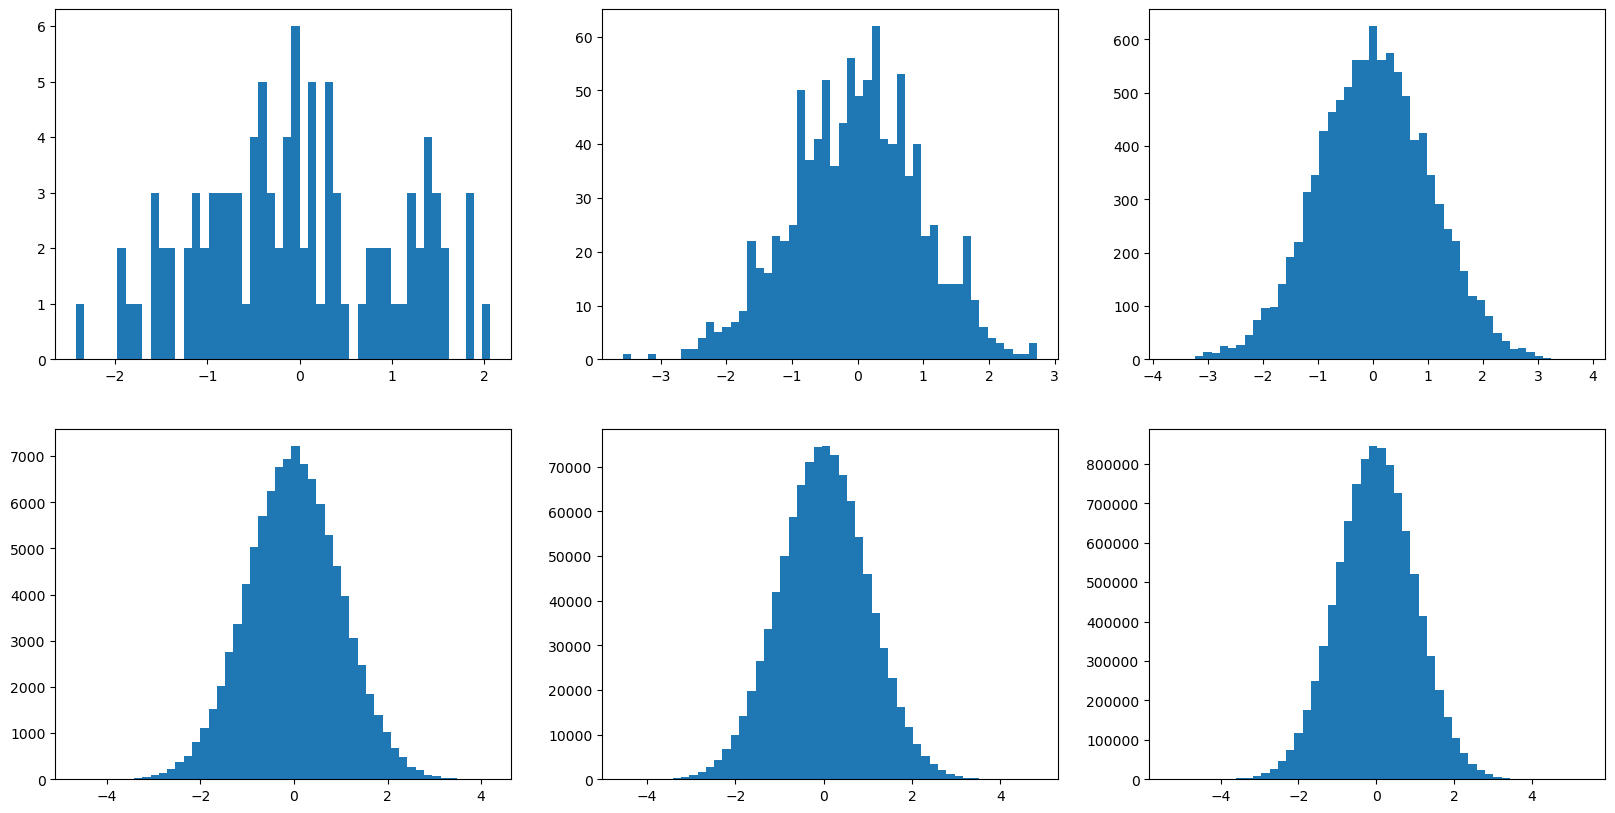

In [13]:
# 샘플수의 변화에 따른 분포 모습.
import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(2,3,figsize=(20,10))

axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)


In [ ]:
import numpy as np
np.random.randn
#같음
from numpy.random import randn

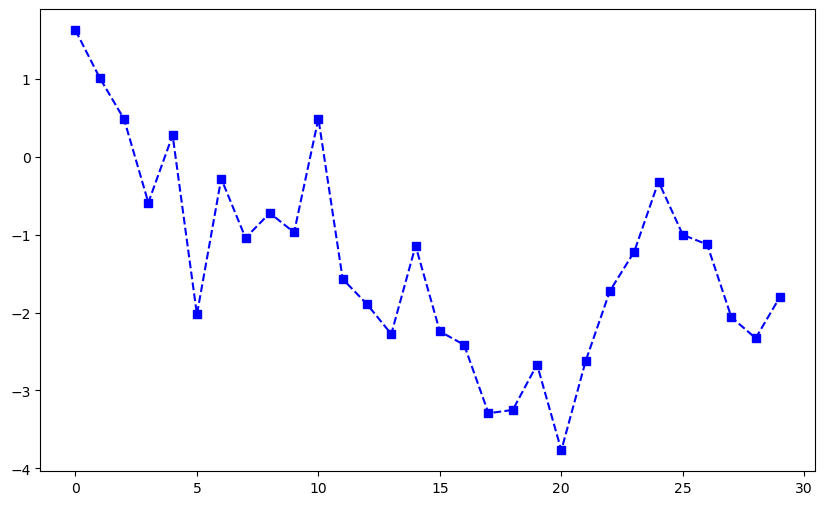

In [29]:
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed',color='b',marker='s')

np.random.seed(0)은 넘파이(NumPy)의 난수(random number) 생성기를 초기화하는 함수입니다. 이 함수를 호출하면, 다음에 생성되는 난수의 시퀀스(sequence)가 고정되어 같은 난수가 생성됩니다. 즉, 같은 시드(seed) 값을 사용하면 항상 같은 결과가 나오게 됩니다.

반면에, 괄호 안에 다른 숫자를 넣으면 다른 시드 값이 설정되므로, 다른 난수 시퀀스가 생성되어 다른 값이 생성됩니다. 예를 들어, np.random.seed(1)을 사용하면, 시드 값이 1로 설정되어 이전과 다른 난수 시퀀스가 생성되므로, 이전과 다른 값이 생성됩니다.

따라서, np.random.seed() 함수를 사용하여 난수 생성 시드 값을 고정하면, 결과가 재현 가능하며, 디버깅이나 실험 등에서 유용하게 사용될 수 있습니다. 하지만, 다른 시드 값을 사용하면, 다른 난수 시퀀스가 생성되어 다른 결과가 나오므로, 시드 값을 변경할 때마다 결과를 다시 확인해야 합니다.

In [34]:
plt.style.available
#해보기

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

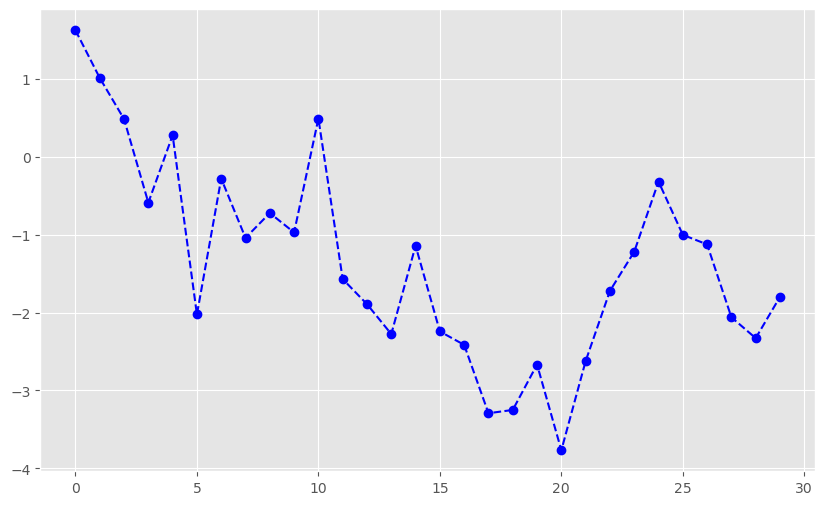

In [35]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed', color='b', marker='o')

In [36]:
np.random.seed(0)
data=np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

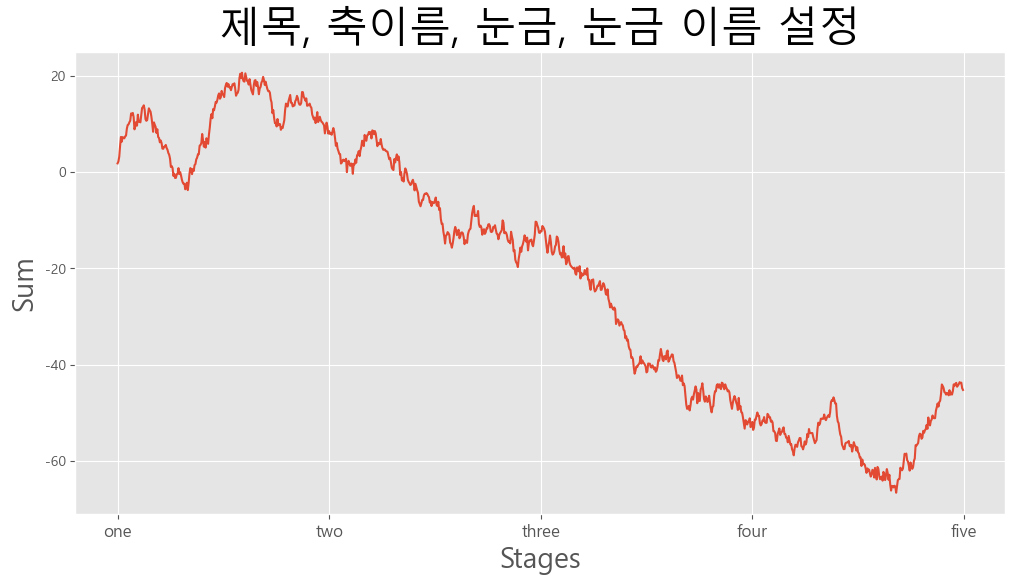

In [46]:
#rc = 폰트설정

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(12,6))
ax= fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks= ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=0, fontsize='large')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)              

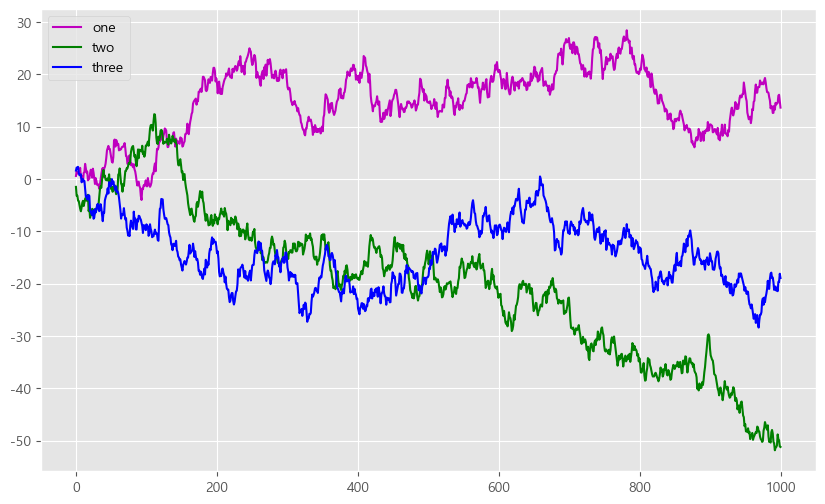

In [48]:
# 범례추가
from numpy.random import randn

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one')
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')
plt.legend(loc='best') # location. 위치는 니가 생각하기에 ㄱㅊ은데 해줘

In [26]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
def age_cat(age):
    cat=''
    if age < 15 : cat = 'young'
    elif age < 30 : cat = 'teen'
    elif age < 45 : cat = 'adult'
    elif age < 60 : cat = 'mature'
    else : cat= 'elder'
    return cat

df['age_cat'] = df['age'].apply(lambda x: age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


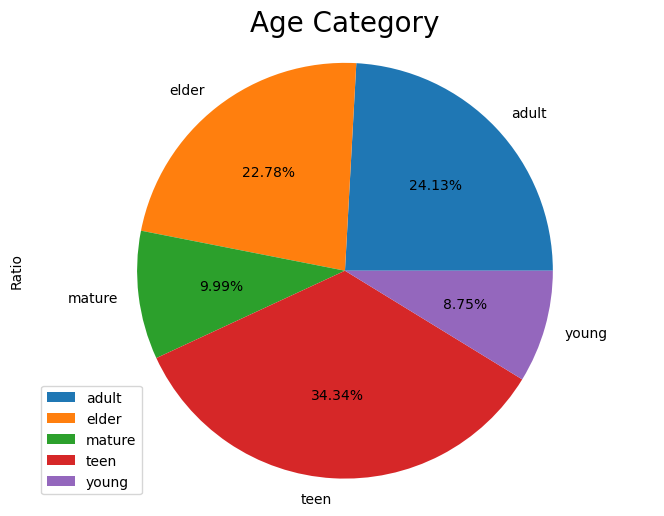

In [28]:
df['Ratio'] = 1

df_age_cat=df.groupby('age_cat').sum() #합계구하기
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal') # 차트의 가로와 세로의 비율을 동일하게 만드는 것.
plt.legend(labels=df_age_cat.index, loc='best')


In [41]:
df['Ratio'] = 1

df_age_cat=df.groupby('age_cat').sum()
df_age_cat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Ratio
age_cat,,,,,,,,,
adult,91,457,7667.00,76,83,8532.2664,137,130,215
elder,59,500,1692.50,106,40,5052.2330,146,152,203
mature,36,146,4483.50,30,27,3893.7461,57,53,89
teen,111,749,6908.50,112,87,8742.7579,197,198,306
young,45,205,453.67,142,103,2472.9459,0,4,78


In [53]:
# 파이차트는 카운트를 해서 쓰는거, -> 열 하나 추가해야한다. 그게 ratio임.
df['Ratio'] = 1 # 레이시오,, 라고 읽으심

df_age_cat=df.groupby('age_cat').sum()
df_age_cat  #안에 있는 내용물들은 합계들.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Ratio
age_cat,,,,,,,,,
adult,91,457,7667.00,76,83,8532.2664,137,130,215
elder,59,500,1692.50,106,40,5052.2330,146,152,203
mature,36,146,4483.50,30,27,3893.7461,57,53,89
teen,111,749,6908.50,112,87,8742.7579,197,198,306
young,45,205,453.67,142,103,2472.9459,0,4,78


In [11]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<AxesSubplot:ylabel='Frequency'>

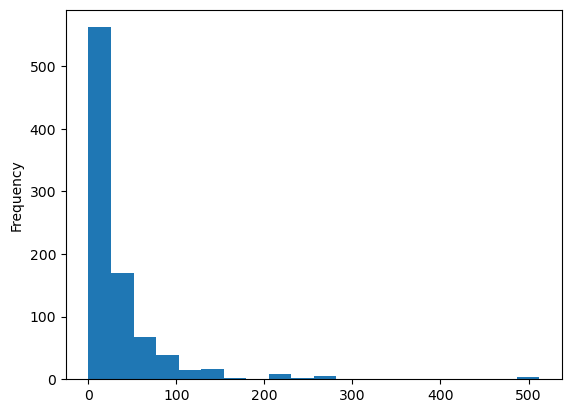

In [13]:
df.fare.plot(kind='hist',bins=20)

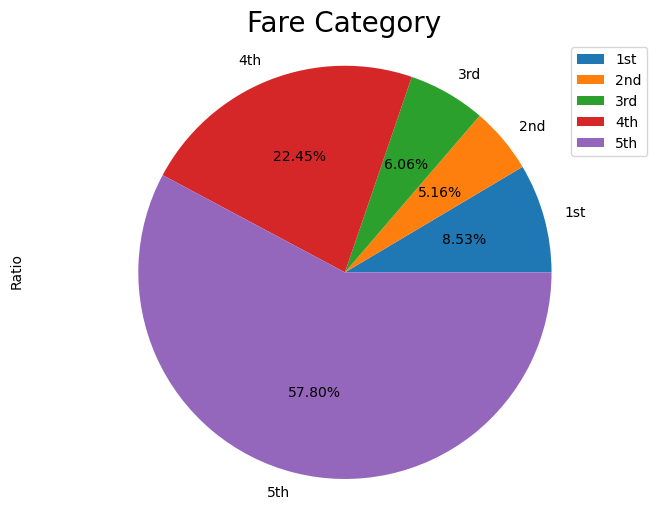

In [10]:
# 과제2. fare를 5개로 범주화하여 fare 컬럼을 생성하고 파이차트로 시각화하세요.

import seaborn as sns
df = sns.load_dataset('titanic')

def fare_cat(fare):
    cat=''
    if fare < 20 : cat = '5th'
    elif fare < 40 : cat = '4th'
    elif fare < 60 : cat = '3rd'
    elif fare < 80 : cat = '2nd'
    else : cat= '1st'
    return cat

df['fare_cat'] = df['fare'].apply(lambda x: fare_cat(x))

df['Ratio'] = 1

df_fare_cat=df.groupby('fare_cat').sum()
df_fare_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Fare Category', size=20)
plt.axis('equal')
plt.legend(labels=df_fare_cat.index, loc='best')


#### 과제3 fifa데이터셋에서 international reputation 컬럼에 대해 파이차트로 시각화하세요.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


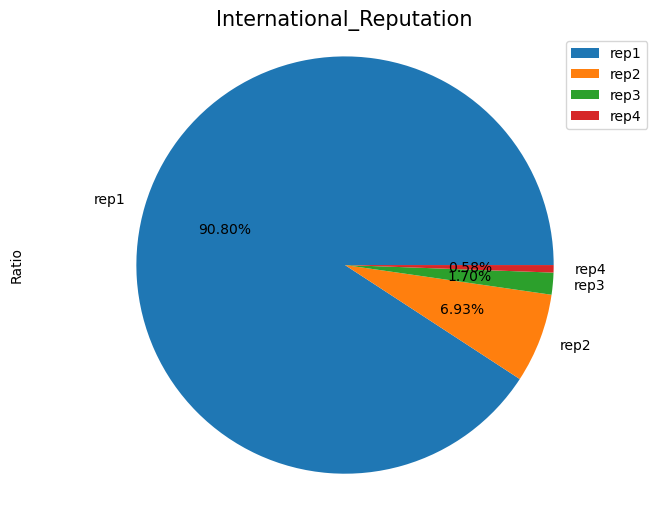

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../dataset/data.csv', index_col=0)

def get_int_rep(International_Reputation):
    cat=''
    if International_Reputation<2 : cat = 'rep1'
    elif International_Reputation<3 : cat = 'rep2'
    elif International_Reputation<4 : cat = 'rep3'
    else : cat = 'rep4'
    return cat

data['inter_rep'] = data['International Reputation'].apply(lambda x:get_int_rep(x))

data['Ratio'] = 1

data_inter_rep=data.groupby('inter_rep').sum()
data_inter_rep.Ratio.plot(kind='pie',
                         figsize=(8,6),
                         autopct='%.2f%%',
                         startangle=0)

plt.title('International_Reputation', size=15)
plt.axis('equal')
plt.legend(labels=data_inter_rep.index, loc='best')

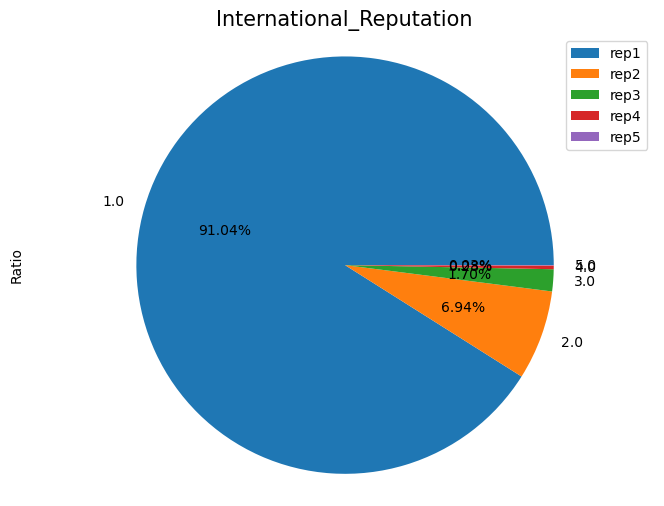

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../dataset/data.csv', index_col=0)
data['Ratio'] = 1

data1 = data['International Reputation']
data1 = data.groupby('International Reputation').sum()
data1.Ratio.plot(kind='pie',
                figsize=(8,6),
                autopct='%.2f%%',
                startangle=0)


plt.title('International_Reputation', size=15)
plt.axis('equal')
plt.legend(['rep1','rep2','rep3','rep4','rep5'],loc='best')

In [9]:
import pandas as pd
data = pd.read_csv('../dataset/data.csv', index_col=0)
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [10]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [11]:
data['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

Text(0.5, 1.0, 'Species and length - horizon')

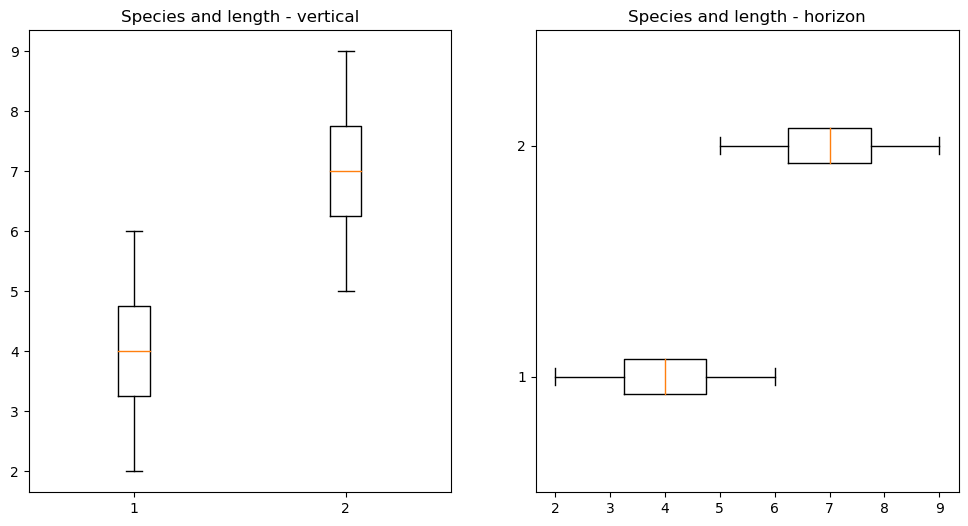

In [4]:
# 물고기의 길이
import matplotlib.pyplot as plt
import pandas as pd


df= pd.read_csv('../dataset/4_fm2.csv')
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(x=[df[df['species']=='A']['length'],
           df[df['species']=='B']['length']])  #두 개의 데이터의 분포를 봐야한다.(위아래)

ax2.boxplot(x=[df[df['species']=='A']['length'],
           df[df['species']=='B']['length']],vert=False) #(수평으로)

ax1.set_title('Species and length - vertical')
ax2.set_title('Species and length - horizon')

#### 과제4. Fifa 데이터셋의 Wage 컬럼을 전처리해서 시각화하고 데이터가 가지고 있는 의미를 설명하세요.

In [9]:
data.Wage.value_counts()

NameError: name 'data' is not defined

In [7]:
# regular expressin 정규표현식
# sub 대체한다

import re
def get_num(x):
    result = int(re.sub('[^0-9]','',x)) # 0-9 모든숫자 ,^: 아닌거-> 숫자가 아닌 걸 공백으로 대체
    return result
# apply 써서 매핑해주기
    
data['NWage'] = data.Wage.apply(lambda x:get_num(x)) 
data[['Wage', 'NWage']].head()

,Wage,NWage
0,€565K,565
1,€405K,405
2,€290K,290
3,€260K,260
4,€355K,355


<AxesSubplot:ylabel='Frequency'>

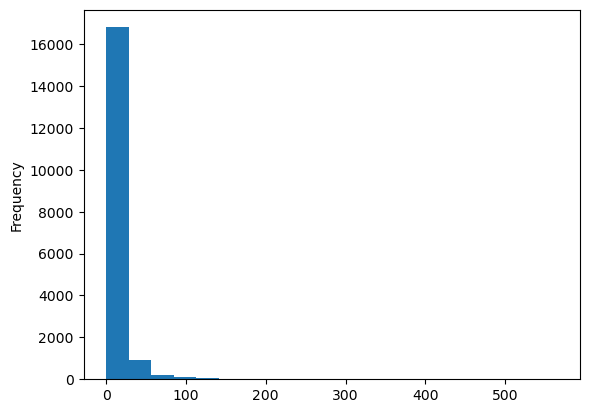

In [10]:
data.NWage.plot(kind='hist',bins=20)

In [11]:
data.NWage.describe()

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: NWage, dtype: float64

<AxesSubplot:ylabel='Frequency'>

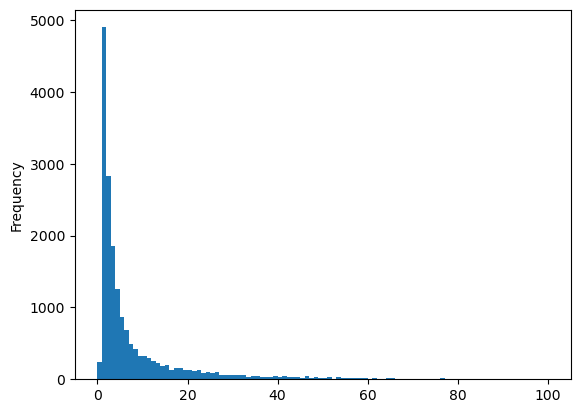

In [12]:
# 이원화, 삼원화 해야할듯 (너무 차이 많아서)
data.NWage[data.NWage <= 100].plot(kind='hist',bins=100)

In [13]:
data.NWage[data.NWage <= 100].describe()

count    18022.000000
mean         8.090556
std         12.874957
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        100.000000
Name: NWage, dtype: float64

로그변환 -> 급격한 차이를 완만하게 변환해주어 알 수 없었던 특징을 알 수 있게 해준다. 

In [14]:
#로그변환 : np.log1p(x)

import numpy as np
def lognum(x):
    result = np.log1p(x)
    return result

data['Lwage'] = data.NWage.apply(lambda x:lognum(x))
data[['NWage','Lwage']].head()

,NWage,Lwage
0,565,6.338594
1,405,6.006353
2,290,5.673323
3,260,5.564520
4,355,5.874931


In [8]:
import seaborn as sns
sns.histplot(data.Lwage,bins=20)
# 데이터의 분포를 자세하게 비교할 수 있다.

NameError: name 'data' is not defined

#### seaborn
- 파이썬의 시각화 라이브러리 중 하나로, matplotlib 라이브러리를 기반으로 하여 좀 더 다양한 시각화 기능과 스타일을 제공 

- seaborn의 특징
    - matplotlib에 비해 더 간결하고 직관적인 API를 제공
    - matplotlib의 스타일을 기본적으로 사용하지만, 좀 더 다양한 스타일을 제공
    - 통계 분석에 사용되는 다양한 그래프를 제공
    - pandas와 연동하여 데이터 시각화를 더욱 편리하게 수행
- seaborn에서 제공하는 그래프
    - relplot: 두 변수 간의 관계를 시각화하는 그래프
    - scatterplot: 산점도 그래프
    - lineplot: 선 그래프
    - histplot: 히스토그램 그래프
    - kdeplot: 밀도 그래프
    - boxplot: 박스 그래프
    - violinplot: 바이올린 그래프
    - heatmap: 히트맵 그래프

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


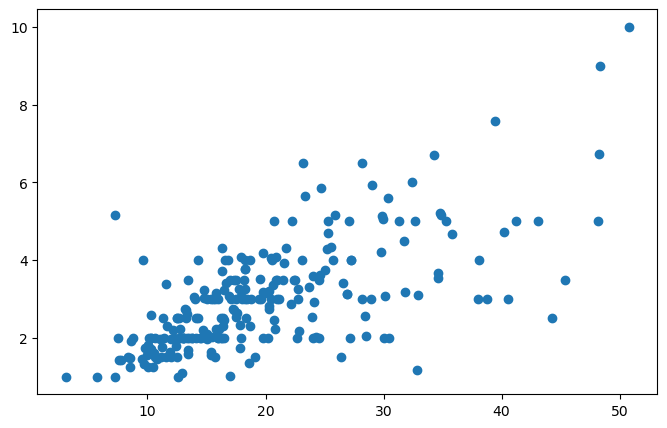

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

x=tips.total_bill
y=tips.tip

plt.figure(figsize=(8,5))
plt.scatter(x,y)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

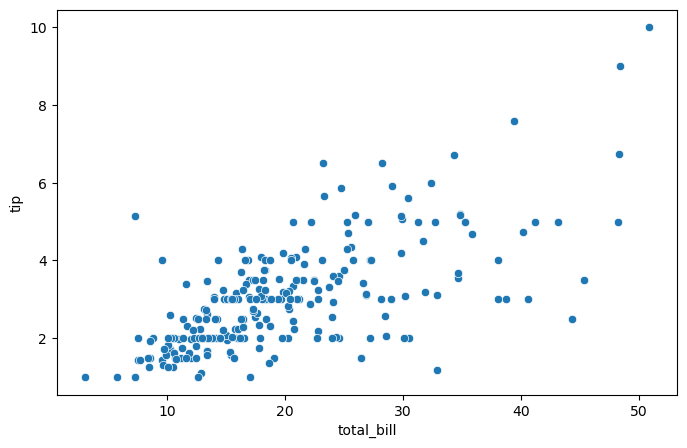

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=x,y=y,data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

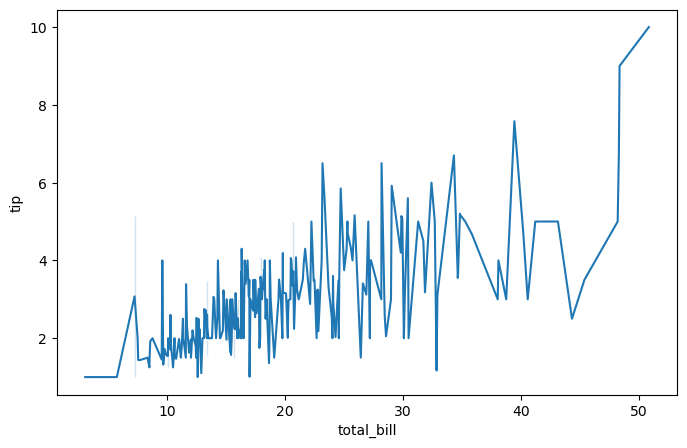

In [12]:
x=tips.total_bill
y=tips.tip
plt.figure(figsize=(8,5))
sns.lineplot(x=x,y=y)

lineplot 함수는 여러 가지 옵션을 제공하며, 이를 사용하여 선 그래프를 더욱 자세하게 설정할 수 있습니다. 
- hue 옵션을 사용하여 'sex' 열의 값에 따라 선 그래프의 색상을 다르게 설정하고, 
- style 옵션을 사용하여 'smoker' 열의 값에 따라 선 그래프의 스타일을 다르게 설정
- markers 옵션을 사용하여 데이터 포인트를 원형 모양으로 표시

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

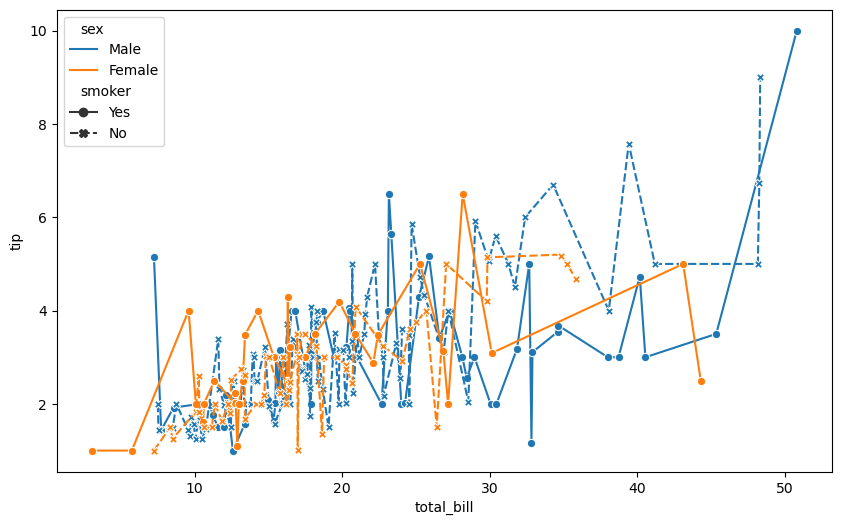

In [13]:
plt.figure(figsize=(10,6))
# hue = 성별의 값에 따라 색상변경
sns.lineplot(x='total_bill',y='tip',hue='sex',style='smoker', markers=True, data=tips)
# smoker의 스타일 변경, marker True 원형임


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

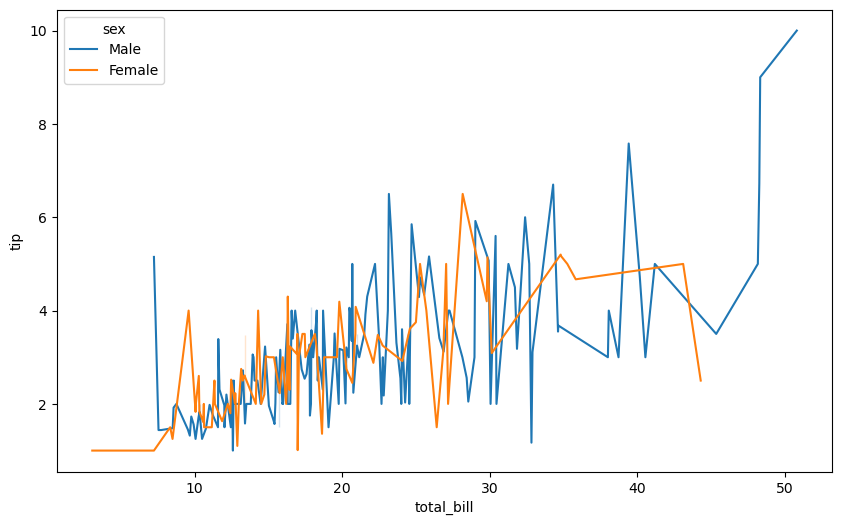

In [14]:
plt.figure(figsize=(10,6))
# hue = 성별의 값에 따라 색상변경
sns.lineplot(x='total_bill',y='tip',hue='sex', data=tips)
# smoker의 스타일 변경, marker True 원형임
# 여성과 남성의 팁 주는거,,,,, 발견하기 어렵네 그죠?

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

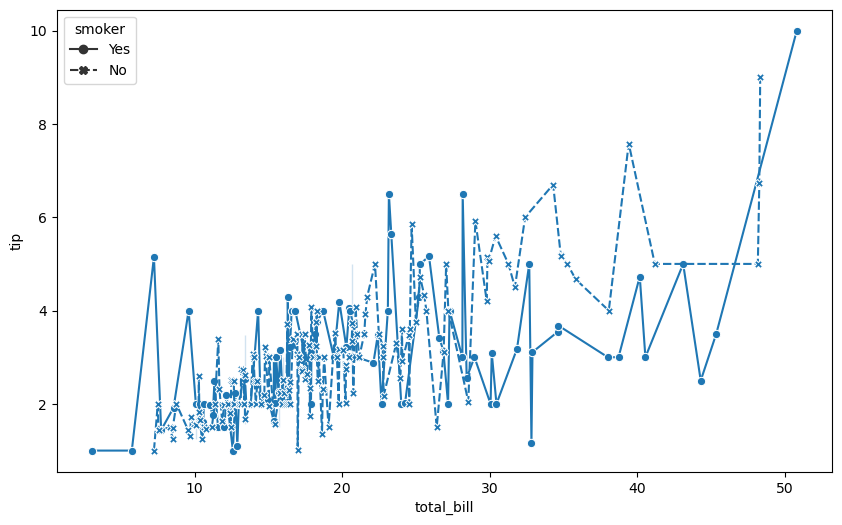

In [15]:
plt.figure(figsize=(10,6))
# hue = 성별의 값에 따라 색상변경
sns.lineplot(x='total_bill',y='tip',style='smoker', markers=True, data=tips)
# smoker의 스타일 변경, marker True 원형임
# 흡연자와 비흡연자. 비흡연자가 많이주나? 비흡연자이면서 비싼음식을 먹는 사람이 팁을 많이 준다.

barplot : 범주형 변수에 대한 막대 그래프
- x축에는 "day" 열의 값, y축에는 "total_bill" 열의 값이 사용됨
- barplot 함수는 기본적으로 각 범주별로 y축 값의 평균과 오차 막대를 그리며, 
- ci 옵션을 사용하여 오차 막대의 크기를 조절

<AxesSubplot:xlabel='day', ylabel='total_bill'>

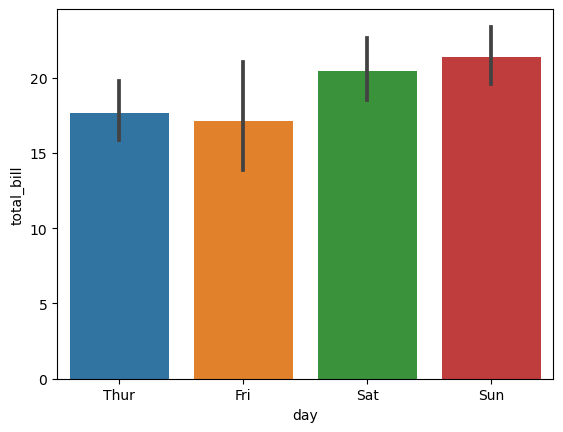

In [16]:
sns.barplot(x='day', y='total_bill',data=tips)
# 까만 선 : 오차막대(오차가 이만큼 발생할 수 있다.)

C:\Users\hh\AppData\Local\Temp\ipykernel_2984\1626294733.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='day', y='total_bill',ci = 'sd',palette='Blues_d', data=tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

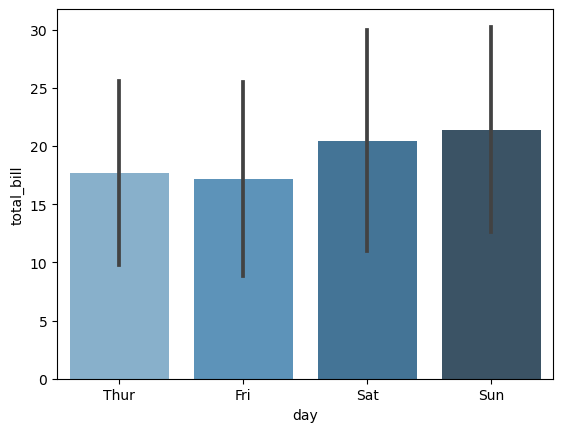

In [17]:
# ci 옵션 사용 (standard divation = 표준편차.)
# 이는 오차 막대의 크기를 y축 값의 표준편차로 설정한다.
# 팔레트 옵션을 사용하여 막대그래프의 색상을 변경.
sns.barplot(x='day', y='total_bill',ci = 'sd',palette='Blues_d', data=tips)

# 뭐 빨간색 뜨면 import wargnings 쓰기
# import warnings
# warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

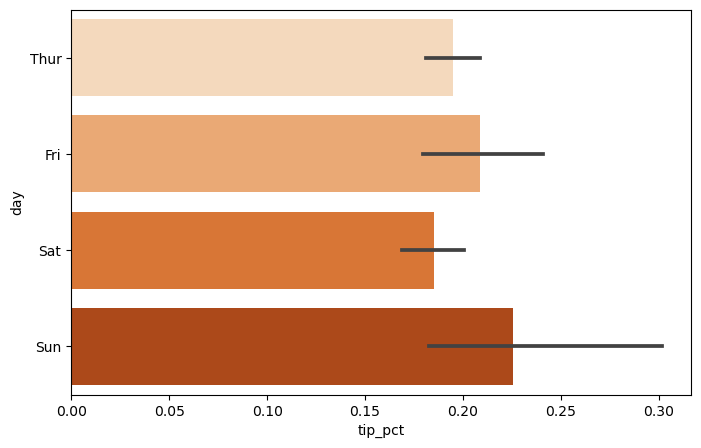

In [18]:
# q. 팁의 비중(tip_pct)을 구해서 요일별 팁의 비중을 보여주는 시각화를 수행하세요.

# x=tips.day
# y=tips.tip
# tip_pct= tips[['total_bill'/'tip']]

# sns.barplot(x, y)

# 선생님
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip']) #마크업 개념

plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct', y='day',palette='Oranges', data=tips,orient='h')

# 마진과 마크업
# 원가 800원인 상품을 1000원에 팔면 마진 200원, 마크업 200원
# 마진은 20%, 마크업은 25%(200/800). 
# 마진: 판매가격의 몇 프로냐. 마크업: 원가에서 몇 프로 남느냐


<AxesSubplot:xlabel='tip_pct', ylabel='time'>

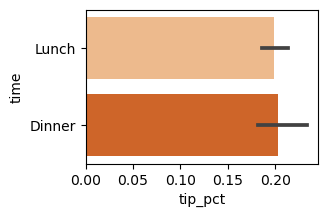

In [19]:
# dinner vs lunch tip

plt.figure(figsize=(3,2))
sns.barplot(x='tip_pct', y='time',palette='Oranges', data=tips,orient='h')

In [24]:
# table size & lunch dinner count
# 막대그래프, 개수를 세서 하는거임. hue는 time을 통해서 구분할거다
plt.figure(figsize=(5,3))
sns.countplot('size', hue='time',palette='bone', data=tips)

TypeError: countplot() got multiple values for argument 'data'

<Figure size 500x300 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

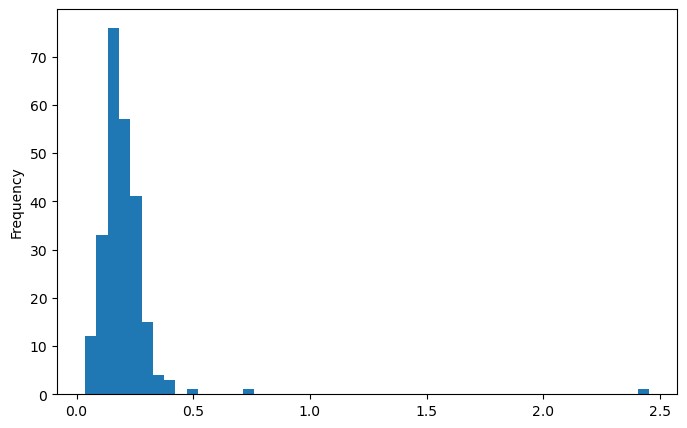

In [57]:
plt.figure(figsize=(8,5))
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

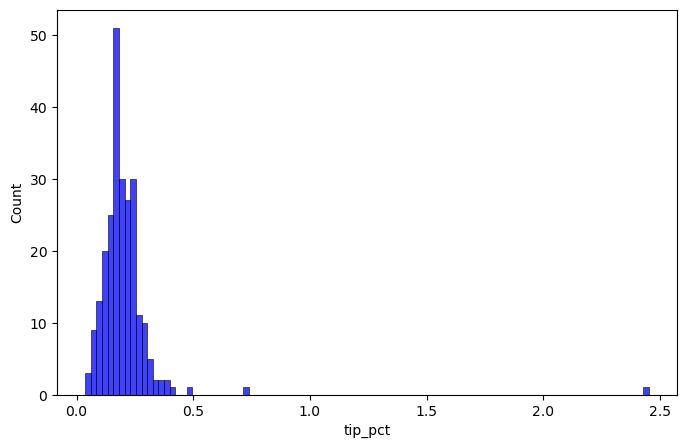

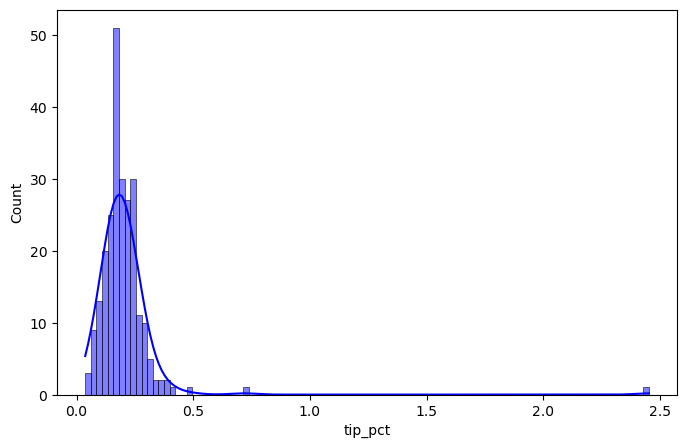

In [66]:
# 히스토그램만
plt.figure(figsize=(8,5))
sns.histplot(tips['tip_pct'],bins=100,color='b')

# 밀도함수 같이 표시하기. kde = True
plt.figure(figsize=(8,5))
sns.histplot(tips['tip_pct'],bins=100,color='b', kde = True)


<AxesSubplot:xlabel='tip_pct', ylabel='Density'>

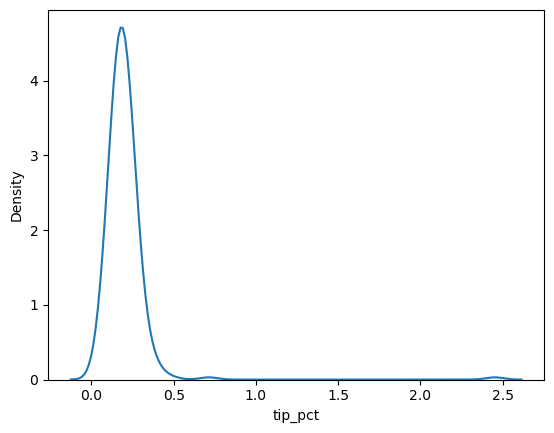

In [126]:
# kde : 확률밀도 함수를 추정하기 위한 방법중 하나로, 커널밀도 추정 그래프를 그리는 함수.
sns.kdeplot(data=tips,x='tip_pct')

In [64]:
# seaborn 버전 업그레이드
!pip install seaborn --upgrade
#현재버전 확인
sns.__version__

'0.11.2'

In [81]:
# 물고기 종류별 몸 길이 데이터

import pandas as pd
fish_multi = pd.read_csv('../dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

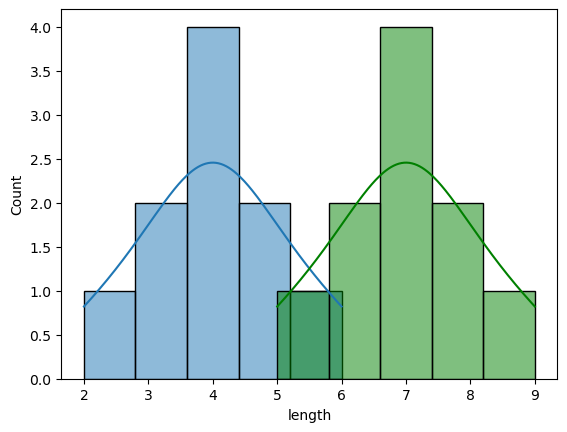

In [74]:
# 히스토그램
length_a=fish_multi[fish_multi.species=='A'] ['length']
length_b=fish_multi[fish_multi.species=='B'] ['length']
sns.histplot(length_a,kde=True)
sns.histplot(length_b,kde=True,color='green')

<AxesSubplot:xlabel='species', ylabel='length'>

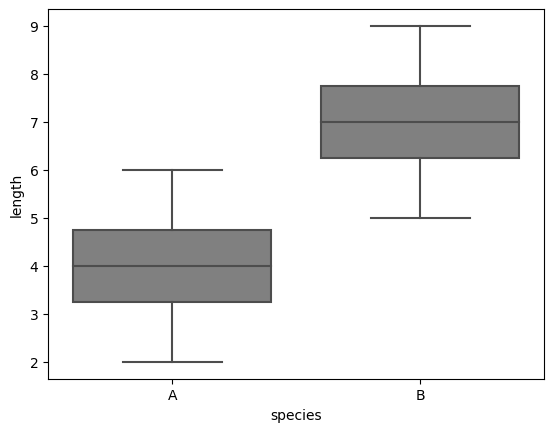

In [85]:
# 박스 플롯
sns.boxplot(x='species', y='length', data=fish_multi, color='gray')

<AxesSubplot:xlabel='species', ylabel='length'>

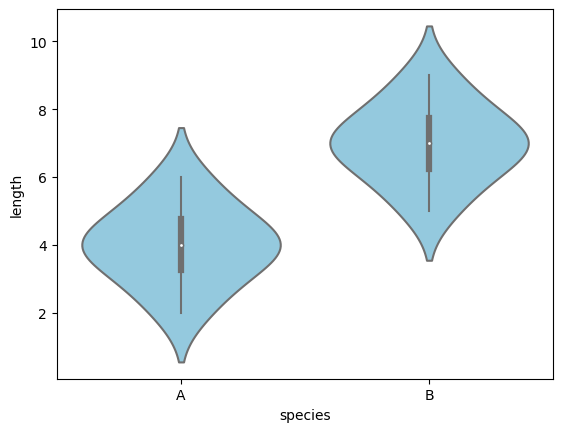

In [87]:
# 바이올린 플롯 : 상자 대신 히스토그램을 세로로 세워서 배치한다.(쉬운설명..^^)
# 어느 부분에 데이터가 집중되어있는지 정보 추가.
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

# 데이터분포, 히스토그램, 박스플롯까지 알수있다.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

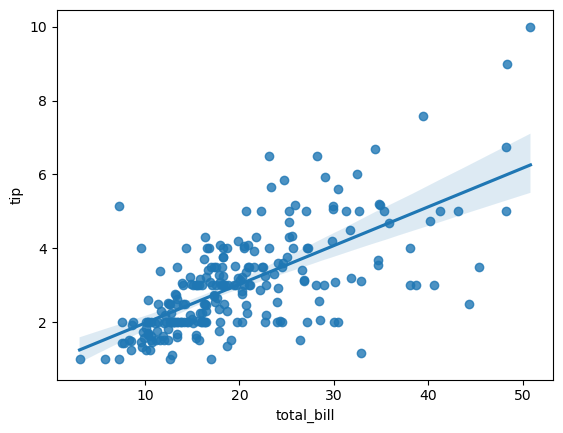

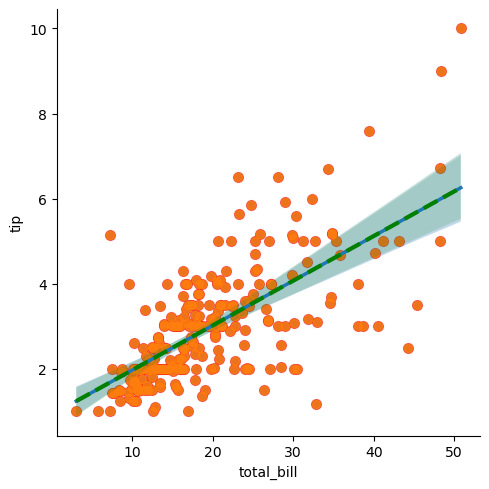

In [103]:
# regplot: 회귀선을 그어준다.
sns.regplot(data=tips,x='total_bill', y='tip' )
#이렇게 그린 lmplot이랑 똑같아용
sns.lmplot(data=tips,x='total_bill', y='tip')

# regplot 추가적인 옵션
# 점과 선에 대해서 옵션을 줄 수 있다.
sns.regplot(data=tips,x='total_bill', y='tip',scatter_kws={'s':50, 'color':'red', 'alpha':0.5})
sns.regplot(data=tips,x='total_bill', y='tip',\
            line_kws={'color':'green', 'linewidth':3, 'linestyle':'--'})

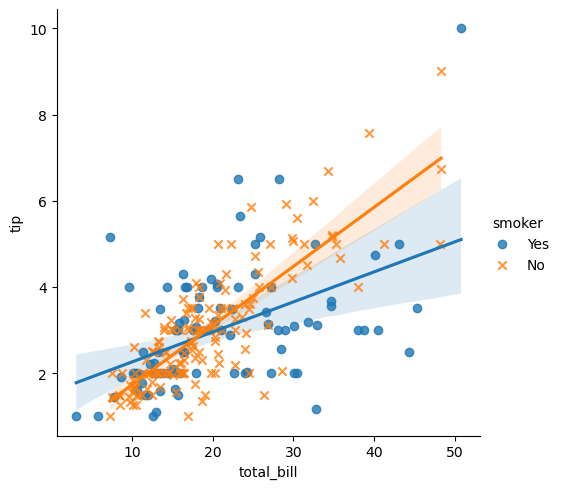

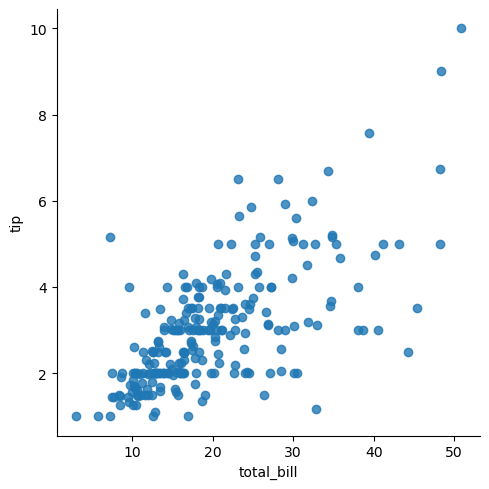

In [97]:
# lmplot : 엘엠플롯, hue 파라미터를 이용하여 데이터의 그룹을 구분할 수 있다.
# 회귀선을 나눠서 그어줄 수 있다.
# 데이터에서 흡연을 기준으로 둘로 나눠서 보여준다.
# 인사이트 -> 비흡연자가 더 팁을 많이 준다.

sns.lmplot(data=tips,x='total_bill', y='tip', hue='smoker', markers=['o','x'])
# sns.lmplot(data=tips,x='total_bill', y='tip')

# 회귀선 없애고 싶을 때
sns.lmplot(data=tips,x='total_bill', y='tip',fit_reg=False)

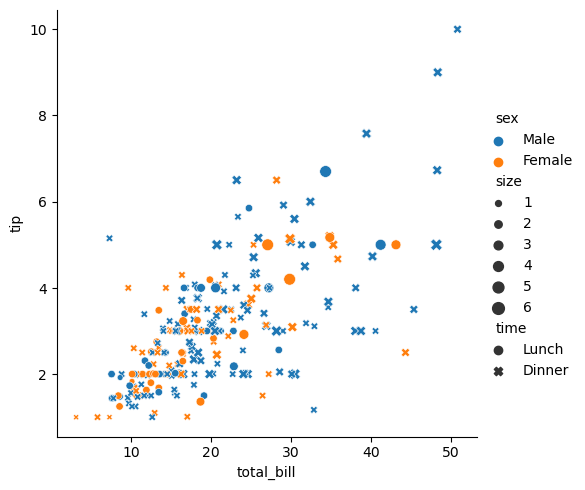

In [108]:
# relplot

sns.relplot(data=tips, x='total_bill', y='tip', hue='sex',style='time', size='size')

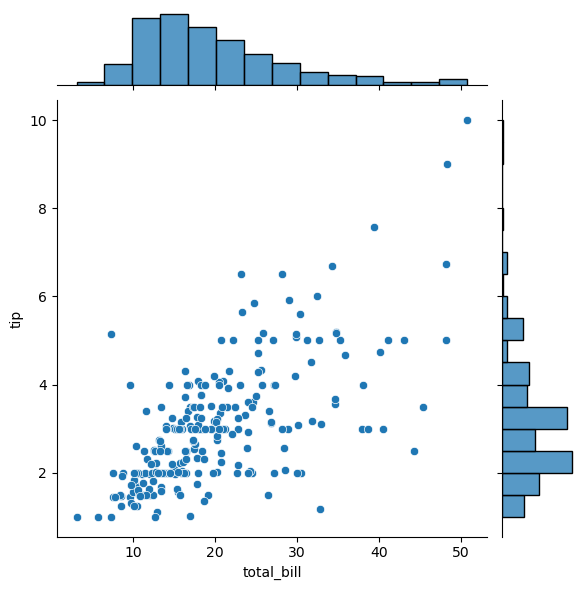

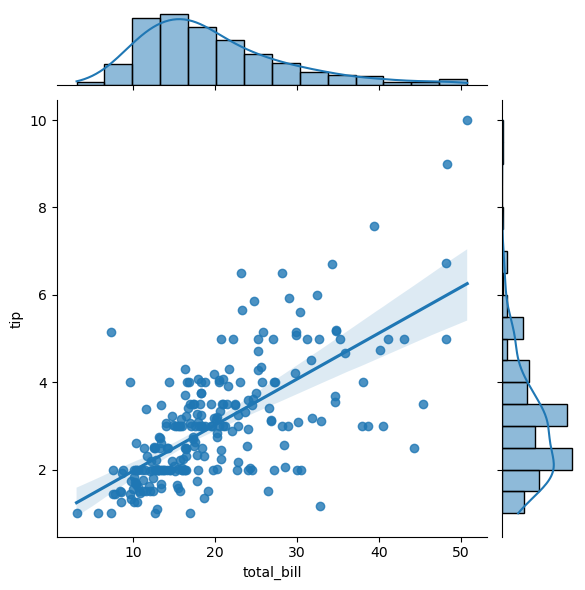

In [93]:
# jointplot: 종합적으로 볼 수 있는 플롯

sns.jointplot(data=tips, x='total_bill' ,y='tip' )

sns.jointplot(data=tips, x='total_bill' ,y='tip', kind='reg' ) #밀도함수까지(regration?)

#히스토그램 확률밀도함수를 한꺼번에 보여줍니다.

<AxesSubplot:>

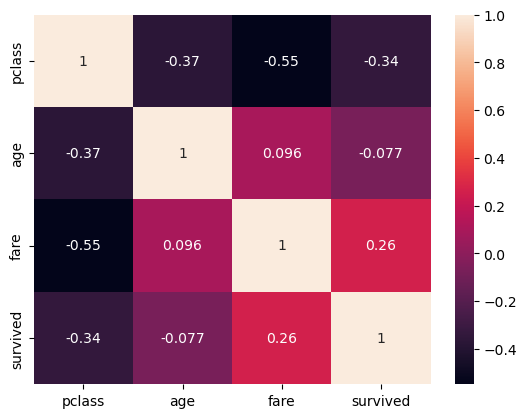

In [110]:
# heatmap
tdf= sns.load_dataset('titanic')
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True) #annotation주석

# 허얘지면 1.0 진해지면 음수
# 색깔에 따른 음/양의 상관관계를 표시한다
# 범주형(1.2.3등석) -> 상관계수로 보는게 무리가 있다. 그래도 관계는 있다(-0.55)

In [112]:
table = tdf.pivot_table(index=['sex'], columns=['class'], values=['survived'], aggfunc='mean')
table

# 데이터가 0하고1인데 평균값이다. 0.96 -> 100명중에 96명 살앗다. 휴~

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

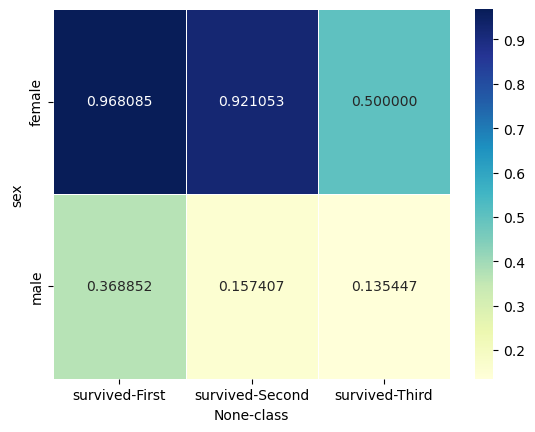

In [119]:
sns.heatmap(table,
            annot=True,fmt='f', #float로 넣을거임
            cmap='YlGnBu',
            linewidth=.5,
            cbar = True)

#### pairplot : 다변량 그래프로 데이터프레임에서 두변수간의 관계를 그래프로 나타냄.
주요 파라미터 옵션

- data: 그래프를 그릴 데이터프레임
- hue: 데이터를 구분할 컬럼명
- vars: 그래프를 그릴 컬럼명
- diag_kind: 대각선에 그려질 그래프의 종류 (hist, kde, ecdf)
- kind: 그래프 종류 (scatter, reg, resid, kde, hex)
- palette: 색상 팔레트
- corner: 그래프의 위치 (lower, upper, both)
- height: 그래프의 높이
- aspect: 그래프의 가로 세로 비율
- dropna: 결측값을 제거할지 여부

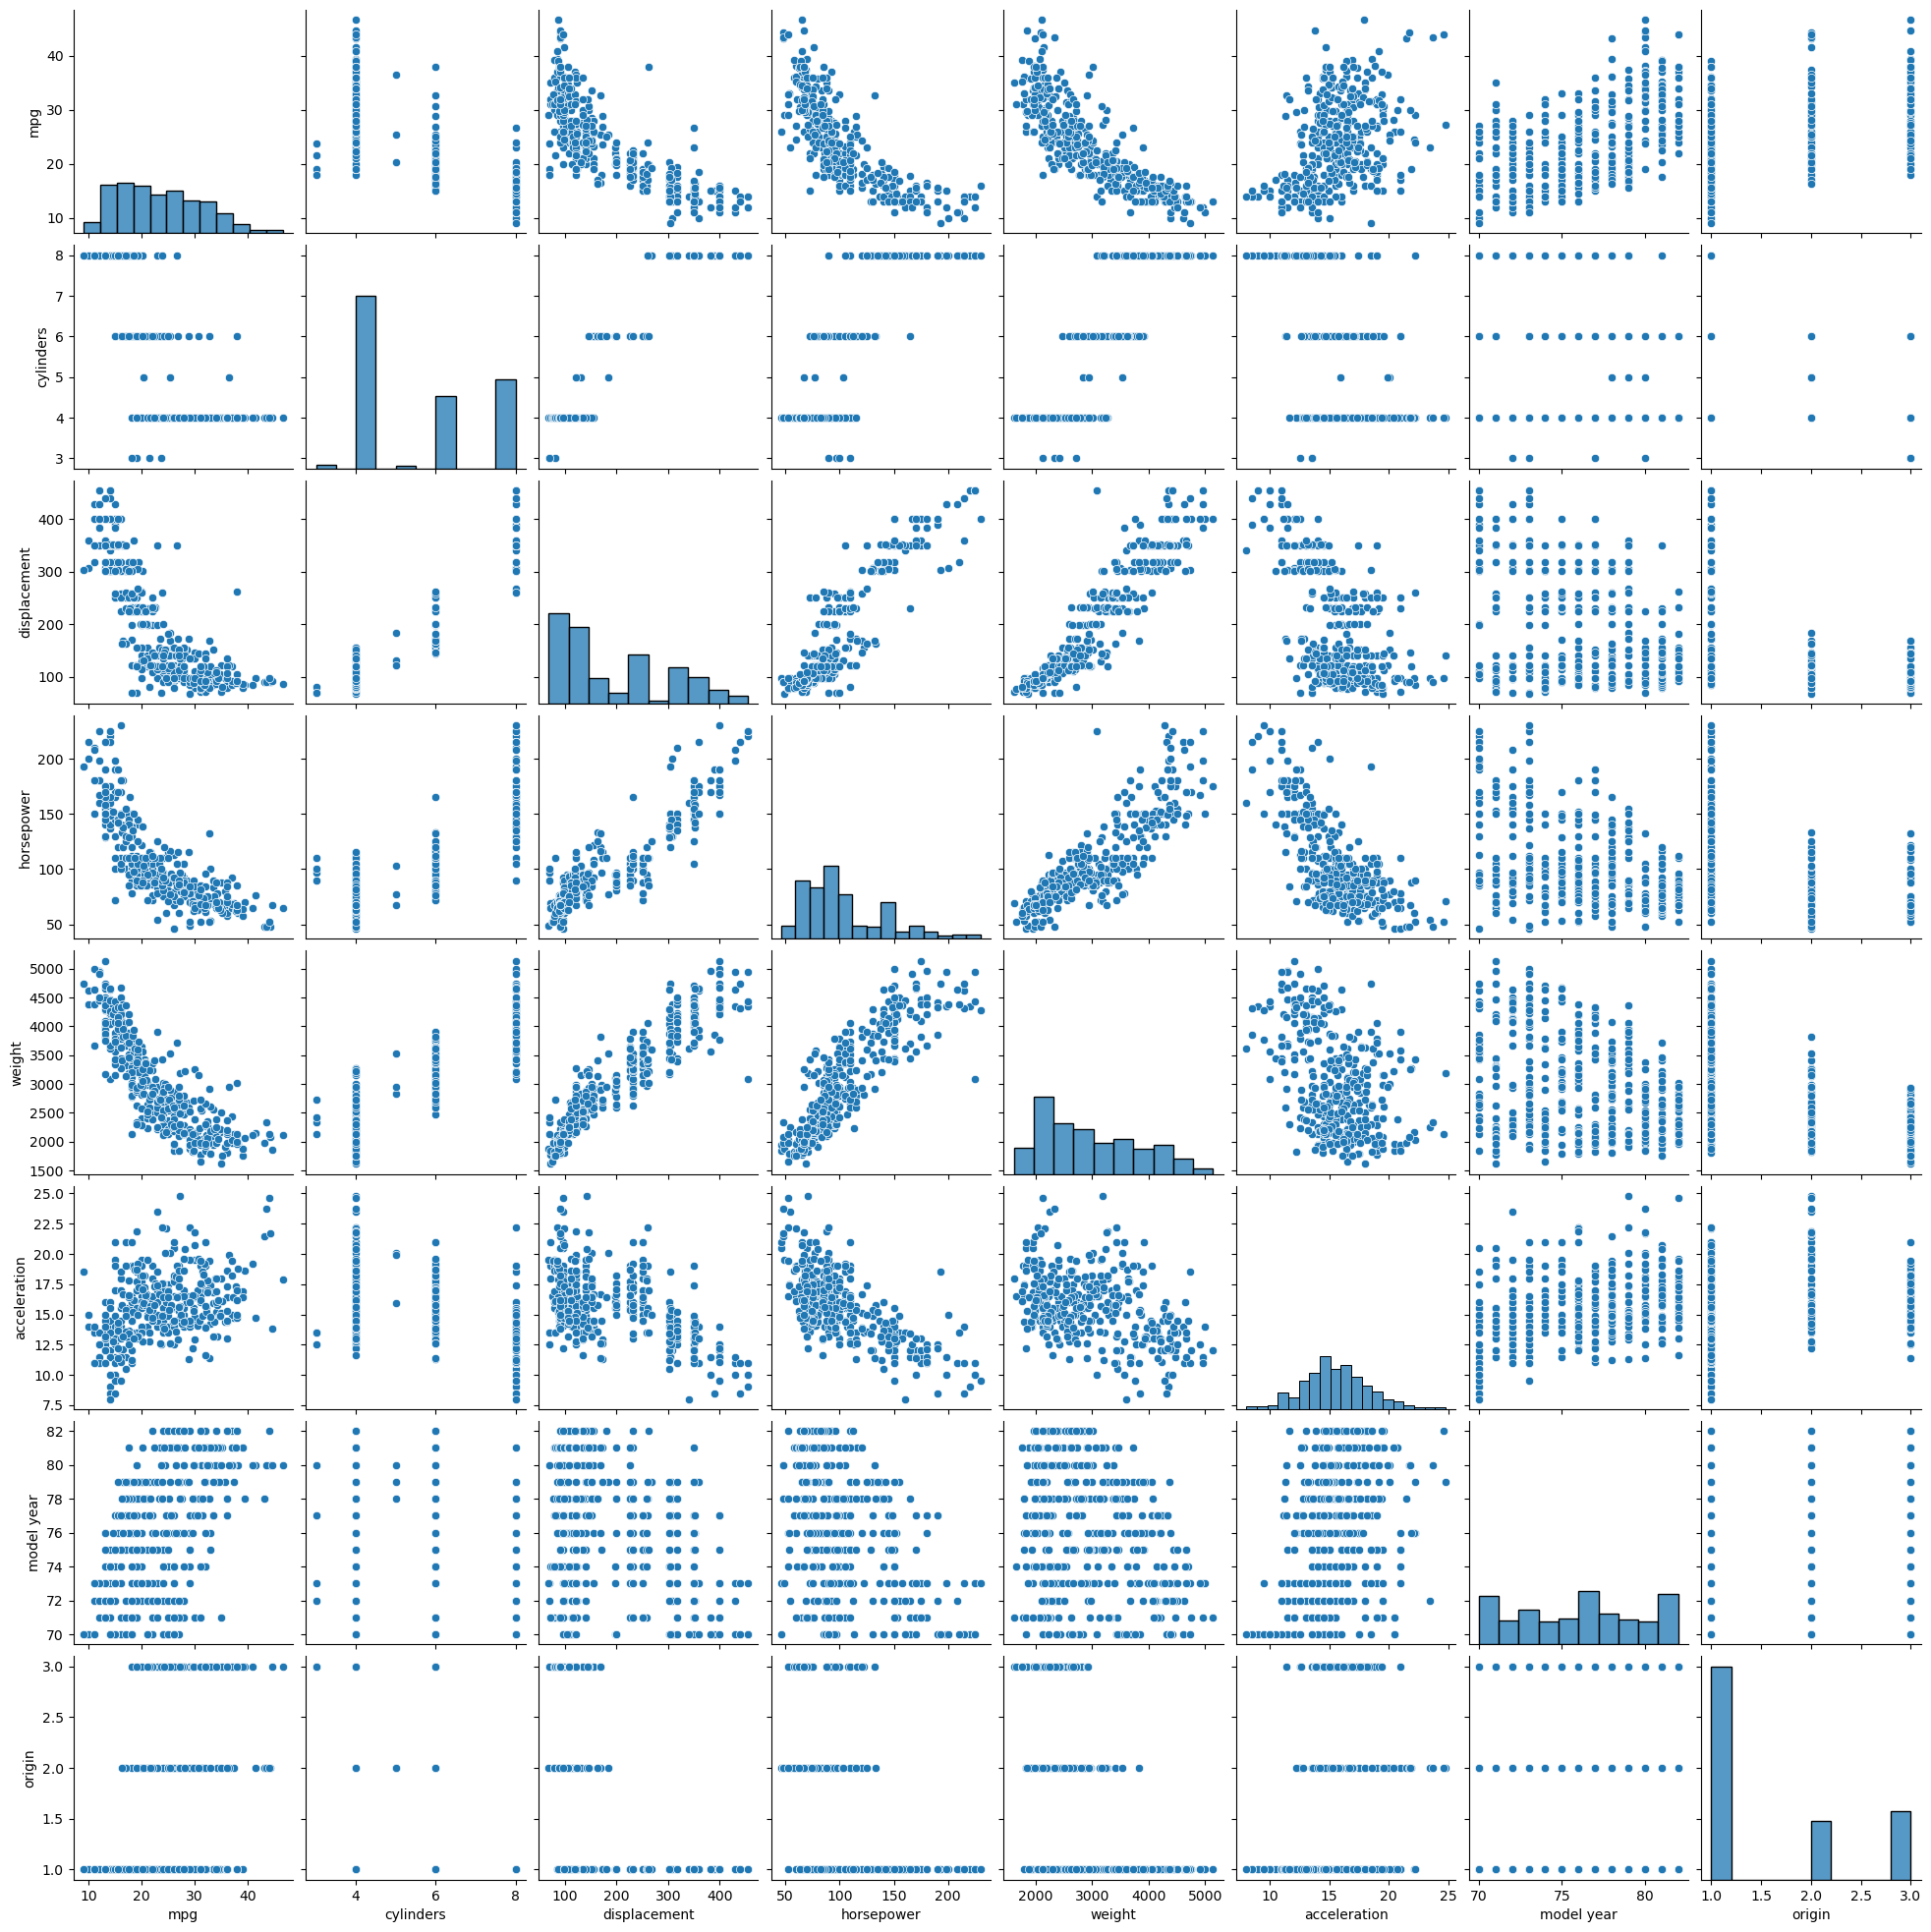

In [125]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns


df_auto=pd.read_pickle('../dataset/auto_df.pkl')
df_auto.head()
sns.pairplot(df_auto,palette='gray')

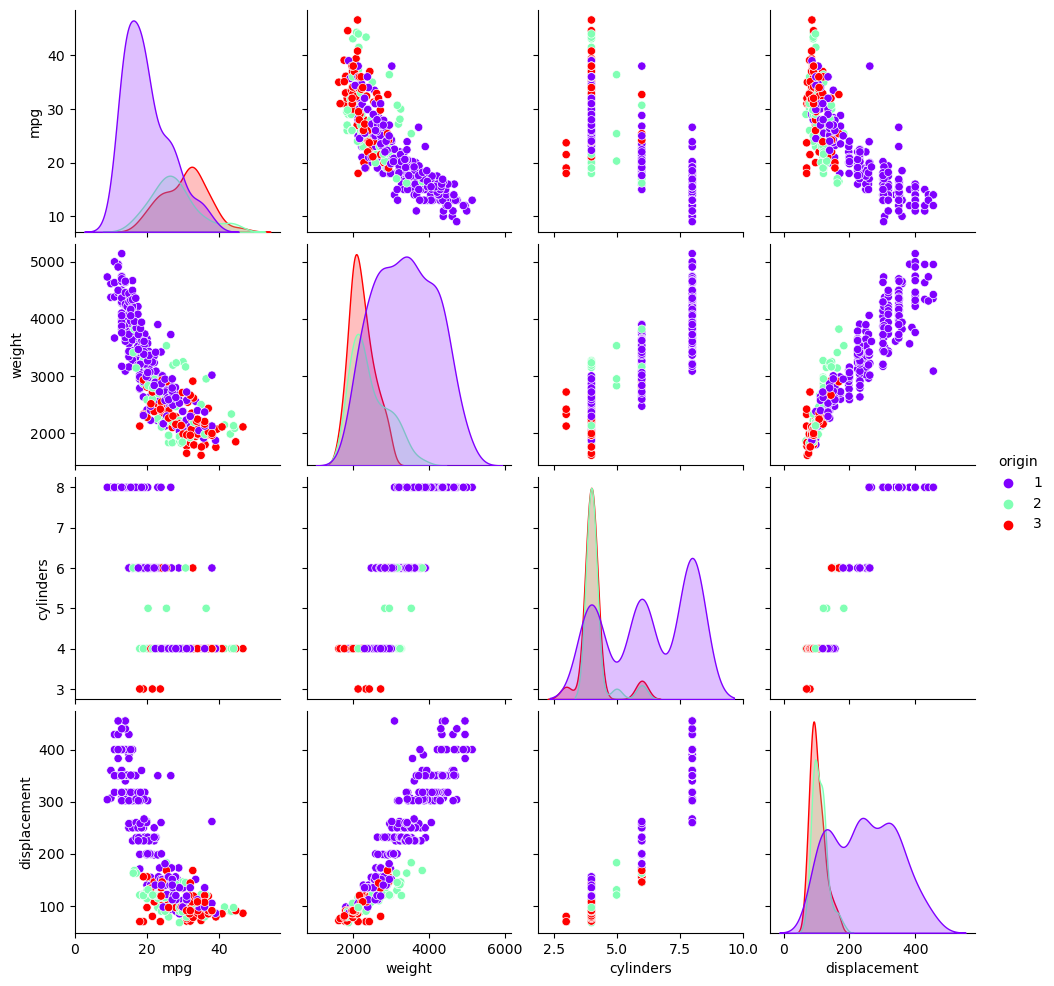

In [128]:
dfa= df_auto[['mpg','weight','cylinders','displacement','origin']]
sns.pairplot(dfa,hue='origin',palette='rainbow')

In [ ]:
과제1.
seaborn 그래프의 각 유형을 적용하기에 적합한 케이스를 설정해서 각 그래프를 이용해서 시각화 하세요.

relplot: 두 변수 간의 관계를 시각화하는 그래프
scatterplot: 산점도 그래프
lineplot: 선 그래프
lmplot: 산점도+회귀선그래프
regplot: 산점도+회귀선그래프
histplot: 히스토그램 그래프
kdeplot: 밀도 그래프
boxplot: 박스 그래프
violinplot: 바이올린 그래프
barplot: 막대 그래프
countplot: 빈도수 그래프
jointplot: 멀티 그래프
heatmap: 히트맵 그래프
pairplot: 다변량 그래프

In [ ]:
과제2.
과제1의 각 경우를 matplotlib 혹은 pandas 내장함수를 이용해서 시각화 하세요.

In [ ]:
과제3.
시각화 라이브러리를 이용하요 아래 각 케이스를 작성 후 출력하세요.
(깃허브 ㄱ ㄱ)